### Steps for CNN of ASL Dataset

Load ASL training and test datasets 
- don't know how to process the image from individual pixels to torch or matplotlib

Define a Convolutional Neural Network
- working on understand different parts of torch architecture steps

Define a loss function

Train the network on the training data

Test the network on the test data

Visualize # of each letter in datasets(Bar graph to show samples in each class)

Randomly generate 1 sample from each class

Show correctly classified and wrongly classified to show why some are easier to classify vs harder to classify

#### Dataset Origin 
https://www.kaggle.com/datamunge/sign-language-mnist

#### pytorch model inspiration
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

#### tensorflow model inspiration
https://github.com/BrianMH/ECE196_Demo/blob/master/CNN_Demo.ipynb

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# from tensorflow.keras.datasets import mnist

In [2]:
df_test = pd.read_csv('./sign_mnist_test.csv')
df_train = pd.read_csv('./sign_mnist_train.csv')

In [3]:
df_train.head() # shows first 5 entries in training dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
#separate labels (letter classes) from training data set
#drop label from rest of pixels
labels_train = df_train['label']
df_train = df_train.drop('label',axis = 1)

In [5]:
# #separate labels (letter classes) from test data set
#drop label from rest of pixels
labels_test = df_test['label']
df_test = df_test.drop('label',axis = 1)

In [6]:
# create dataframe with all labels to make a bargraph
frames = [labels_train,labels_test]
df_all_labels = pd.concat(frames)
print(df_all_labels.shape)
df_all_labels.head()

(34627,)


0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

In [7]:
alphabet_dict = {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 
                 6: 'g', 7: 'h', 8: 'i', 10: 'k', 11: 'l', 
                 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 
                 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 
                 22: 'w', 23: 'x', 24: 'y'}
alphabet = ['a', 'b',  'c',  'd', 'e', 'f', 
                 'g', 'h', 'i',  'k',  'l', 
                  'm',  'n',  'o',  'p',  'q', 
                  'r', 's',  't',  'u',  'v', 
                  'w','x','y']
def numToAlpha(numArr):
    templist = list(numArr)
    templistAlpha = [alphabet_dict[number] for number in templist]
    tempArrAlpha = np.array(templistAlpha)
    return tempArrAlpha

In [8]:
# convert pandas df to numpy array and reshape into 28x28 array as prep for picture
''' only relevant for following cell with random image display'''

np_train_img = df_train.to_numpy() #training dataset
np_train_img = np_train_img.reshape(np_train_img.shape[0],28,28)
np_test_img = df_test.to_numpy() # testing dataset
np_test_img = np_test_img.reshape(np_test_img.shape[0],28,28)

In [9]:
#convert pandas to numpy arrays for use in tensorflow
np_test =df_test.to_numpy()
np_train = df_train.to_numpy()
labels_train = labels_train.to_numpy()
labels_test = labels_test.to_numpy()


In [10]:
#convert training data to alphabetical labels
# labels_train_list = list(labels_train)
# labels_train_alphabet = [alphabet_dict[number] for number in labels_train_list]
# labels_train_alphabet = np.array(labels_train_alphabet)
labels_train_alphabet = numToAlpha(labels_train)

#convert testing data to alphabetical labels
# labels_test_list = list(labels_test)
# labels_test_alphabet = [alphabet_dict[number] for number in labels_test_list]
# labels_test_alphabet = np.array(labels_test_alphabet)
labels_test_alphabet = numToAlpha(labels_test)

all_labels_alphabet = numToAlpha(df_all_labels)

Text(0.5, 1.0, 'All data')

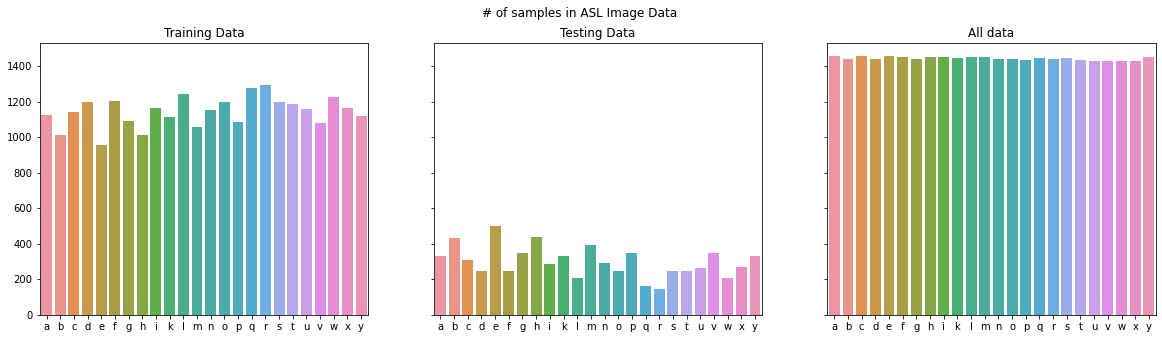

In [11]:
import seaborn as sns
unique, counts_train = np.unique(labels_train_alphabet, return_counts=True)
unique, counts_test = np.unique(labels_test_alphabet, return_counts=True)
unique, counts_all = np.unique(all_labels_alphabet, return_counts=True)

'''Want to change so that 0,1,2,3 etc reads A,B,C,D etc'''
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('# of samples in ASL Image Data')

# Train data
sns.barplot(ax=axes[0], x=alphabet, y=counts_train)
axes[0].set_title('Training Data')

# Test Data
sns.barplot(ax=axes[1], x=alphabet, y=counts_test)
axes[1].set_title('Testing Data')

# Combined
sns.barplot(ax=axes[2], x=alphabet, y=counts_all)
axes[2].set_title('All data')

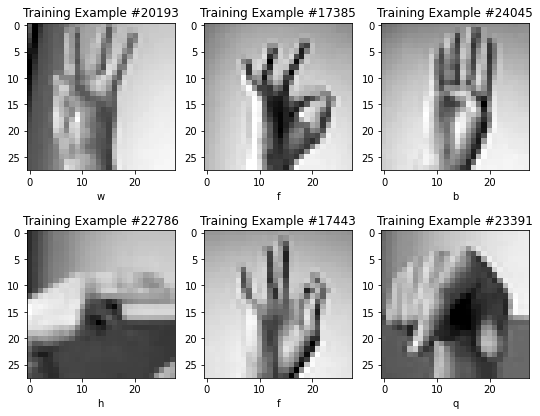

In [12]:
import random
# Shows 6 random training examples with labels
plt.figure(figsize=(9,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    randindex = random.randint(0,len(np_train_img))
    plt.imshow(np_train_img[randindex],cmap='gray')
    plt.title(f"Training Example #{randindex}")
    plt.xlabel(labels_train_alphabet[randindex])
    
plt.show()

In [13]:
# This loads in the dataset. Thankfully, TensorFlow already has methods to load this dataset

#define target values
y_train = labels_train
y_test = labels_test

# Normalize input values
x_train = np_train/255. #0-1
x_test = np_test/255.

# Generate 32x32 image set for use in LeNet
cnn_x_train = x_train.reshape(-1,28,28,1) # don't know what this 1 does
cnn_x_test = x_test.reshape(-1,28,28,1)

# Resize images for use in MLP
mlp_x_train = x_train.reshape((x_train.shape[0], 784))
mlp_x_test = x_test.reshape((x_test.shape[0], 784))

In [14]:
mlp_x_train.shape

(27455, 784)

### Set a seed to be constant throughout all neural network model fitting
- instead of shuffling the data randomly, use tensorflow random.set_seed
- randomization is part of initialization, several layers, optimizations 
https://machinelearningmastery.com/reproducible-results-neural-networks-keras/
https://github.com/keras-team/keras/issues/2743
- setting random numpy and tensorflow seeds at the top of the notebook

SEED = 196

from numpy.random import seed

seed(SEED)

from tensorflow import set_random_seed

set_random_seed(SEED)

- tried initializing the same weights over multiple runs
- shuffling the input data in a constant seed
- checked all tensorflow functions for a seed variable to input

In [ ]:
# from tensorflow import set_random_seed
# #set a seed for all model fitting
# SEED = 196
# set_random_seed(SEED)

In [15]:
# Implements the network using TensorFlow.Keras
def MLPNetwork(inputDim):
    # input layer (note that batches are already taken care of for you)
    x = keras.Input(shape=(inputDim,))
    
    # subsequent dense layers
    a1 = keras.layers.Dense(512, activation='relu')(x)
    a2 = keras.layers.Dense(512, activation='relu')(a1)
    
    # classification dense layer
    logits = keras.layers.Dense(25, activation='softmax')(a2)
    
    # Creates the model given the above structure
    model = keras.Model(inputs=x, outputs=logits)
    return model

MLPmod = MLPNetwork(784)
MLPmod.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 25)                12825     
Total params: 677,401
Trainable params: 677,401
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Sets up optimizer
opt = keras.optimizers.Adam(learning_rate=0.001)
MLPmod.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# The callback forces the network to train until it reaches 100% accuracy
hist = MLPmod.fit(mlp_x_train, y_train, epochs=20, shuffle=True)

Train on 27455 samples
Epoch 1/20
27455/27455 [==============================] - 5s 178us/sample - loss: 1.5956 - acc: 0.4940
Epoch 2/20
27455/27455 [==============================] - 5s 174us/sample - loss: 0.6178 - acc: 0.7958
Epoch 3/20
27455/27455 [==============================] - 5s 173us/sample - loss: 0.2976 - acc: 0.9029
Epoch 4/20
27455/27455 [==============================] - 5s 169us/sample - loss: 0.1431 - acc: 0.9566
Epoch 5/20
27455/27455 [==============================] - 5s 177us/sample - loss: 0.1010 - acc: 0.9688
Epoch 6/20
27455/27455 [==============================] - 5s 173us/sample - loss: 0.0647 - acc: 0.9808
Epoch 7/20
27455/27455 [==============================] - 4s 156us/sample - loss: 0.0997 - acc: 0.9682
Epoch 8/20
27455/27455 [==============================] - 5s 174us/sample - loss: 0.0260 - acc: 0.9922
Epoch 9/20
27455/27455 [==============================] - 5s 170us/sample - loss: 0.0016 - acc: 1.0000
Epoch 10/20
27455/27455 [=========================

In [17]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = MLPmod.evaluate(mlp_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 95us/sample - loss: 0.8347 - acc: 0.8272
Test accuracy for this model is 0.8272448182106018


In [18]:
# create pandas dataframe to store all model testing/training loss/acc
model_data = {'test': [],
                'training loss': [],
              'training acc': [],
              'testing loss':[],
              'testing acc': []}
model_info = pd.DataFrame(model_data)


In [19]:
from tensorflow.keras.callbacks import History

#History allows us to access accuracy and loss values in the model
history = History() 

#initialize data for new data frame row
new_row = {'test': ['Multilayer Perceptron'],
                'training loss': [hist.history['loss'][-1]],
              'training acc': [hist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,Multilayer Perceptron,0.001532,1.0,0.83467,0.827245


In [208]:
# Creates the model with LeNet architecture, first state of the art neural network
def LeNet():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    #dropout 1 
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    # dropout 2
    #extra convolution 
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  # more on this later
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) #access loss?
    
    return mod

# Declares the model and prepares it for training
LeNetMod = LeNet()
opt = keras.optimizers.Adam()
LeNetMod.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
# LeNetMod.load_weights('./ASL_CNN_Image_Recognition/default_random_weights')
LeNetMod.summary()

Model: "model_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_69 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_130 (Avera (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_131 (Avera (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_66 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_133 (Dense)            (None, 120)               308

In [ ]:
#save default weights to reuse to try to achieve same results
# Save the weights (second runthrough)
# LeNetMod.save_weights('./ASL_CNN_Image_Recognition/default_random_weights')

In [21]:
# Trains the network using mini-batch learning
cnnHist = LeNetMod.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=20, shuffle=True, callbacks = [history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 6s 279us/sample - loss: 1.7235 - acc: 0.4667 - val_loss: 0.7472 - val_acc: 0.7504
Epoch 2/20
20591/20591 [==============================] - 3s 168us/sample - loss: 0.4620 - acc: 0.8502 - val_loss: 0.2315 - val_acc: 0.9317
Epoch 3/20
20591/20591 [==============================] - 3s 170us/sample - loss: 0.1645 - acc: 0.9506 - val_loss: 0.0986 - val_acc: 0.9735
Epoch 4/20
20591/20591 [==============================] - 3s 169us/sample - loss: 0.0627 - acc: 0.9842 - val_loss: 0.0406 - val_acc: 0.9894
Epoch 5/20
20591/20591 [==============================] - 3s 165us/sample - loss: 0.0319 - acc: 0.9932 - val_loss: 0.0497 - val_acc: 0.9879
Epoch 6/20
20591/20591 [==============================] - 3s 166us/sample - loss: 0.0545 - acc: 0.9848 - val_loss: 0.0527 - val_acc: 0.9814
Epoch 7/20
20591/20591 [==============================] - 3s 167us/sample - loss: 0.0202 - acc: 0.9943 - val_lo

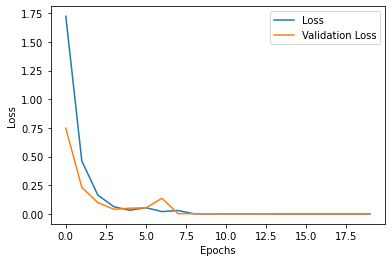

In [22]:
# cnnHist.history == dictionary with all saved loss and accuracy values
a = cnnHist.history['loss']
b = cnnHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

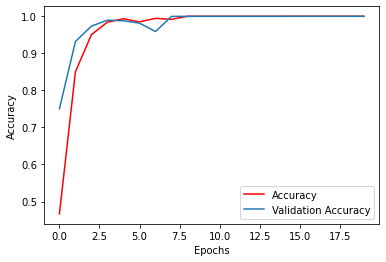

In [23]:
acc_hist = cnnHist.history['acc']
val_acc_hist = cnnHist.history['val_acc']
plt.plot(range(len(acc_hist)),acc_hist, 'r')
plt.plot(range(len(val_acc_hist)),val_acc_hist)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','Validation Accuracy'])

In [24]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = LeNetMod.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 152us/sample - loss: 0.8076 - acc: 0.8689
Test accuracy for this model is 0.8689347505569458


In [25]:
#initialize data for new data frame row
new_row = {'test': ['LeNet original'],
                'training loss': [cnnHist.history['loss'][-1]],
              'training acc': [cnnHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,Multilayer Perceptron,0.001532,1.0,0.834670,0.827245
1,LeNet original,0.000058,1.0,0.807563,0.868935


There are 940/7172 incorrectly labeled signs


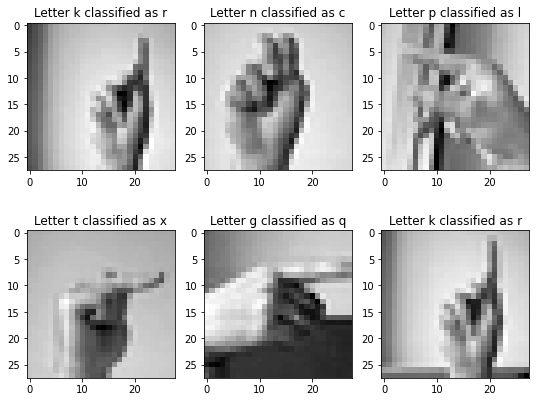

In [26]:
# Plot an incorrect value...
preds = LeNetMod.predict(cnn_x_test)
preds = np.argmax(preds, axis=1)
#convert preds to alphabetical labels
preds_alphabet = numToAlpha(preds)
incorrectPreds = np.argwhere(preds_alphabet != labels_test_alphabet)
print("There are {}/{} incorrectly labeled signs".format(incorrectPreds.shape[0],cnn_x_test.shape[0]))

plt.figure(figsize=(9,7))

for i in range(6):
    plt.subplot(2,3,i+1)
    randIncInd = np.random.choice(incorrectPreds.reshape(-1))
    plt.imshow(cnn_x_test[randIncInd].reshape(28,28), cmap = 'gray')
    plt.title("Letter {} classified as {}".format(labels_test_alphabet[randIncInd], preds_alphabet[randIncInd]))
    
plt.show()

Text(95.72222222222221, 0.5, 'Actual')

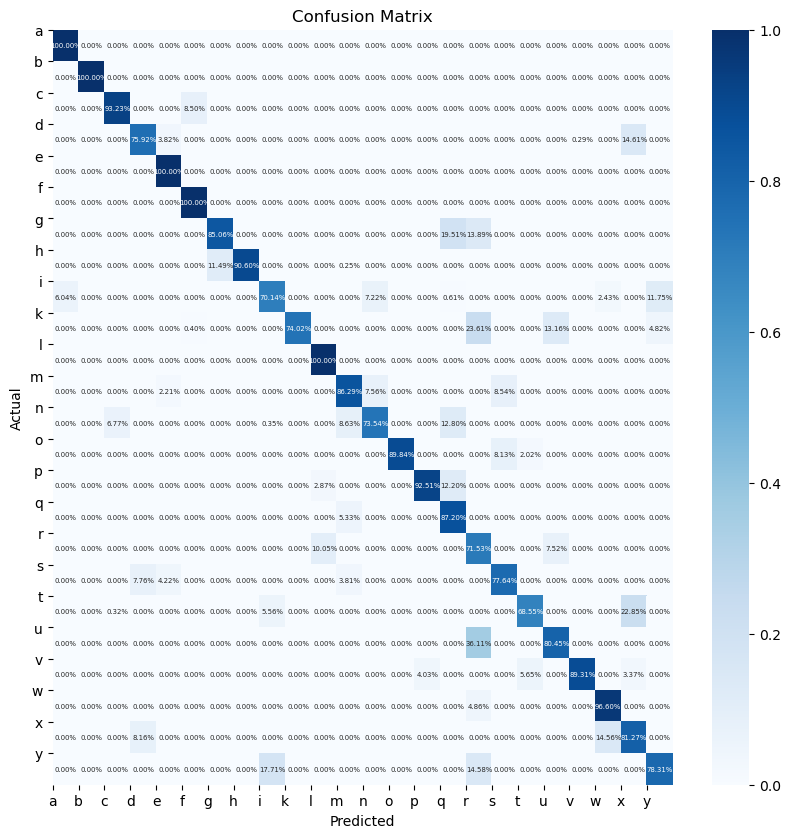

In [27]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
#define alphabet - missing j and z because those are moving signs
alphabet = ['a', 'b',  'c',  'd', 'e', 'f', 
                 'g', 'h', 'i',  'k',  'l', 
                  'm',  'n',  'o',  'p',  'q', 
                  'r', 's',  't',  'u',  'v', 
                  'w','x','y']
conMat = confusion_matrix(y_test, preds)
plt.figure(figsize=(10,10), dpi=100)
heatmap(conMat/np.sum(conMat,axis=1), annot=True, annot_kws={"size": 5}, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xticks(range(len(alphabet)), alphabet)
plt.yticks(range(len(alphabet)), alphabet, rotation='horizontal')
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Improvements 4-24

- add layers/architecture (available layers in tensorflow) dropout could be helpful
- dropout used in FNN, fully connected to delete certain weights (helps to generalize better)
- add penalty to certain classes e.g 16 is 42% incorrect, give greater weight to certain class
- data augmentation (rotate image, resizing)
- test different optimizer (SGD) and test different loss function (categorical cross entropy)
- .ImageDataGenerator??? rotates pictures?
- hyperparameters to consider: batch size, epochs, learning rate, kernel size, activation functions?

## 4/24/21 Improvements
- add layers/architecture (available layers in tensorflow) dropout could be helpful
- dropout used in FNN, fully connected to delete certain weights (helps to generalize better)
- add penalty to certain classes e.g 16 is 42% incorrect, give greater weight to certain class
- data augmentation (rotate image, resizing)
- convert numbers to A-Z for readability

## Implement VGG16 Architecture
- LeNet may be overfitting as training acc is 100% and test acc is 86%

In [ ]:
# vgg = tf.keras.applications.vgg16.VGG16(
#     include_top=True, weights= None, input_tensor=None,
#     input_shape=None, pooling=None, classes=1000,
#     classifier_activation='softmax')

In [ ]:
#vggmod = keras.applications.vgg16.VGG16(include_top = False, input_shape = (28,28,3))

In [ ]:
# opt = keras.optimizers.Adam()
# vggmod.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# vggmod.summary()

In [ ]:
# cnn_vgg_hist = vggmod.fit(cnn_x_train, y_train, validation_split = 0.25, 
#                        batch_size=128, epochs=5, shuffle=True, callbacks = [history])

### Implementation considerations
- image augmentation via ImageDataGenerator
- early_stopping to stop model if it is not improving 


### Trying VGG 16
- overcomplicating the problem

In [28]:
from tensorflow.keras.layers import Input, Conv2D 
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense 
from tensorflow.keras import Model
# input
# https://towardsdatascience.com/creating-vgg-from-scratch-using-tensorflow-a998a5640155

vgginput = Input(shape =(28,28,1)) #changed from default shape of (224,224,3)
# 1st Conv Block

x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(vgginput)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 2nd Conv Block

x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 3rd Conv block

x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 4th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 5th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# Fully connected layers

x = Flatten()(x)
x = Dense(units = 1024, activation ='relu')(x) #changed num units
x = Dense(units = 1024, activation ='relu')(x) #changed num units
output = Dense(units = 25, activation ='softmax')(x) #changed num units
# creating the model

vggmodel = Model (inputs=vgginput, outputs =output)
opt = keras.optimizers.Adam()
vggmodel.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
vggmodel.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0   

In [29]:
vggHist = vggmodel.fit(cnn_x_train, y_train, validation_split = 0.25, 
                       batch_size=50, epochs=5, shuffle=True, callbacks = [history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/5
20591/20591 [==============================] - 14s 688us/sample - loss: 3.1894 - acc: 0.0453 - val_loss: 3.1808 - val_acc: 0.0409
Epoch 2/5
20591/20591 [==============================] - 9s 456us/sample - loss: 3.1790 - acc: 0.0440 - val_loss: 3.1800 - val_acc: 0.0424
Epoch 3/5
20591/20591 [==============================] - 9s 457us/sample - loss: 3.1784 - acc: 0.0462 - val_loss: 3.1774 - val_acc: 0.0468
Epoch 4/5
20591/20591 [==============================] - 10s 469us/sample - loss: 3.1776 - acc: 0.0432 - val_loss: 3.1778 - val_acc: 0.0447
Epoch 5/5
20591/20591 [==============================] - 10s 473us/sample - loss: 3.1775 - acc: 0.0447 - val_loss: 3.1769 - val_acc: 0.0420


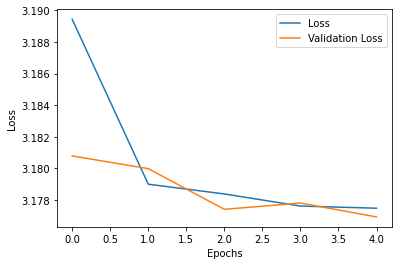

In [30]:
vggHist.history# training loss
a = vggHist.history['loss']
b = vggHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [31]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = vggmodel.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 3s 427us/sample - loss: 3.1993 - acc: 0.0343
Test accuracy for this model is 0.0343000553548336


In [32]:
#initialize data for new data frame row
new_row = {'test': ['vgg16 reshaped'],
                'training loss': [vggHist.history['loss'][-1]],
              'training acc': [vggHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index() 
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,Multilayer Perceptron,0.001532,1.000000,0.834670,0.827245
1,LeNet original,0.000058,1.000000,0.807563,0.868935
2,vgg16 reshaped,3.177472,0.044728,3.199315,0.034300


### Constants in testing
 - kernel size = 5x5
 - learning rate = .001
 - batch size = 50
 - epochs = 20
 - validation split = 25%
 - optimizer = opt = Adam() opt = keras.optimizers.Adam()
 - relu activation function
 - softmax activation function to classify at end of model
 - sparse_categorical_crossentropy loss model

In [37]:
#testing constants
#learning rate is already Adam default
BATCH_SIZE = 50
EPOCHS = 20
VAL_SPLIT = 0.25

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping( monitor = 'loss', min_delta=0.001, # minimium amount of decreasing loss to count as improvement
                                patience=10, # how many epochs to wait before stopping
                                restore_best_weights=True
                              )

## Testing Structure
- create a new CNN model
- compile model
- fit model to training data
- test model with testing data
- log accuracy, loss
- (maybe) input testing and training loss of each model in a bar graph?
- for all dropout layers use the same SEED to drop out same random data


### Test #1 
- add dropout layer after first pooling
- try 10% and 20% and continue on with that

In [34]:
#Set seed for all dropout layers

SEED = 196

In [35]:
# LeNet model with 10 % dropoout after first pooling
def testModel_1a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.1, seed = SEED)(out) # randomly sets 10% of data values to 0
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod1a = testModel_1a()
opt = keras.optimizers.Adam()
testMod1a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod1a.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0   

In [36]:
testMod1aHist = testMod1a.fit(cnn_x_train, y_train, validation_split = VAL_SPLIT, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 223us/sample - loss: 1.8261 - acc: 0.4334 - val_loss: 1.0045 - val_acc: 0.6662
Epoch 2/20
20591/20591 [==============================] - 4s 204us/sample - loss: 0.7691 - acc: 0.7480 - val_loss: 0.5580 - val_acc: 0.8198
Epoch 3/20
20591/20591 [==============================] - 4s 199us/sample - loss: 0.4365 - acc: 0.8533 - val_loss: 0.3076 - val_acc: 0.9072
Epoch 4/20
20591/20591 [==============================] - 4s 203us/sample - loss: 0.2452 - acc: 0.9206 - val_loss: 0.1530 - val_acc: 0.9532
Epoch 5/20
20591/20591 [==============================] - 4s 215us/sample - loss: 0.1441 - acc: 0.9571 - val_loss: 0.0576 - val_acc: 0.9901
Epoch 6/20
20591/20591 [==============================] - 4s 210us/sample - loss: 0.0960 - acc: 0.9725 - val_loss: 0.0446 - val_acc: 0.9898
Epoch 7/20
20591/20591 [==============================] - 4s 209us/sample - loss: 0.0595 - acc: 0.9845 - val_lo

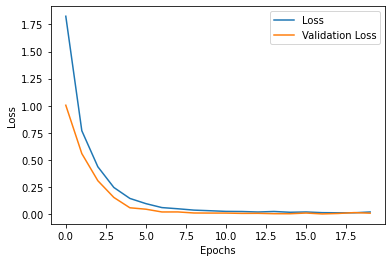

In [38]:
# testMod1aHist.history# training loss
a = testMod1aHist.history['loss']
b = testMod1aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [39]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod1a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 129us/sample - loss: 0.6565 - acc: 0.8774
Test accuracy for this model is 0.8774400353431702


In [40]:
#initialize data for new data frame row
new_row = {'test': ['1a: 10% DO'],
                'training loss': [testMod1aHist.history['loss'][-1]],
              'training acc': [testMod1aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,Multilayer Perceptron,0.001532,1.000000,0.834670,0.827245
1,LeNet original,0.000058,1.000000,0.807563,0.868935
2,vgg16 reshaped,3.177472,0.044728,3.199315,0.034300
3,1a: 10% DO,0.018993,0.994901,0.656520,0.877440


In [41]:
# LeNet model with 20 % dropoout after first pooling
def testModel_1b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    out = keras.layers.Dropout(rate = 0.2, seed = SEED)(out) # randomly sets 20% of data values to 0
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod1b = testModel_1b()
opt = keras.optimizers.Adam()
testMod1b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod1b.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0   

In [42]:
testMod1bHist = testMod1b.fit(cnn_x_train, y_train, validation_split = VAL_SPLIT, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 223us/sample - loss: 1.9145 - acc: 0.4047 - val_loss: 0.9707 - val_acc: 0.6788
Epoch 2/20
20591/20591 [==============================] - 4s 208us/sample - loss: 0.7490 - acc: 0.7548 - val_loss: 0.4530 - val_acc: 0.8629
Epoch 3/20
20591/20591 [==============================] - 4s 212us/sample - loss: 0.3866 - acc: 0.8736 - val_loss: 0.1968 - val_acc: 0.9508
Epoch 4/20
20591/20591 [==============================] - 4s 215us/sample - loss: 0.2168 - acc: 0.9311 - val_loss: 0.1106 - val_acc: 0.9760
Epoch 5/20
20591/20591 [==============================] - 4s 216us/sample - loss: 0.1465 - acc: 0.9543 - val_loss: 0.0699 - val_acc: 0.9835
Epoch 6/20
20591/20591 [==============================] - 5s 221us/sample - loss: 0.0940 - acc: 0.9721 - val_loss: 0.0398 - val_acc: 0.9914
Epoch 7/20
20591/20591 [==============================] - 4s 215us/sample - loss: 0.0699 - acc: 0.9788 - val_lo

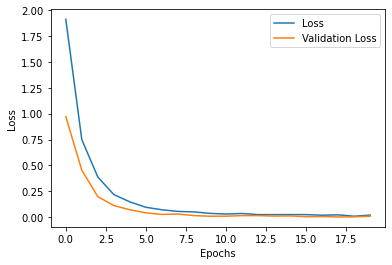

In [43]:
# testMod1bHist.history
a = testMod1bHist.history['loss']
b = testMod1bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [44]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod1b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 137us/sample - loss: 0.5419 - acc: 0.8656
Test accuracy for this model is 0.8655884265899658


In [45]:
#initialize data for new data frame row
new_row = {'test': ['1b: 20% DO'],
                'training loss': [testMod1bHist.history['loss'][-1]],
              'training acc': [testMod1bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,Multilayer Perceptron,0.001532,1.000000,0.834670,0.827245
1,LeNet original,0.000058,1.000000,0.807563,0.868935
2,vgg16 reshaped,3.177472,0.044728,3.199315,0.034300
3,1a: 10% DO,0.018993,0.994901,0.656520,0.877440
4,1b: 20% DO,0.018041,0.994706,0.541907,0.865588


### 10% DO performed better than 20% DO

### Test #2
- add dropout layer after second pooling
- try 10% and 20% and continue on with that

In [46]:
# LeNet model with 10 % dropoout after second pooling
def testModel_2a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.1, seed = SEED)(out) # randomly sets 10% of data values to 0
    #extra convolution
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod2a = testModel_2a()
opt = keras.optimizers.Adam()
testMod2a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod2a.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)               0   

In [47]:
testMod2aHist = testMod2a.fit(cnn_x_train, y_train, validation_split = VAL_SPLIT, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 219us/sample - loss: 1.9100 - acc: 0.4109 - val_loss: 0.8679 - val_acc: 0.7252
Epoch 2/20
20591/20591 [==============================] - 4s 211us/sample - loss: 0.6982 - acc: 0.7684 - val_loss: 0.4024 - val_acc: 0.8674
Epoch 3/20
20591/20591 [==============================] - 4s 213us/sample - loss: 0.3671 - acc: 0.8751 - val_loss: 0.2248 - val_acc: 0.9222
Epoch 4/20
20591/20591 [==============================] - 4s 211us/sample - loss: 0.2297 - acc: 0.9226 - val_loss: 0.0921 - val_acc: 0.9754
Epoch 5/20
20591/20591 [==============================] - 4s 214us/sample - loss: 0.1524 - acc: 0.9497 - val_loss: 0.0699 - val_acc: 0.9863
Epoch 6/20
20591/20591 [==============================] - 4s 215us/sample - loss: 0.1046 - acc: 0.9636 - val_loss: 0.0336 - val_acc: 0.9959
Epoch 7/20
20591/20591 [==============================] - 4s 211us/sample - loss: 0.0935 - acc: 0.9700 - val_lo

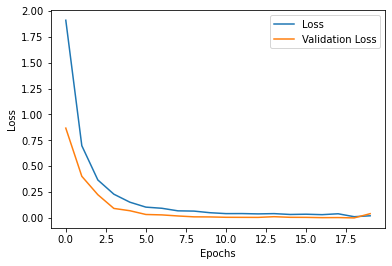

In [48]:
a = testMod2aHist.history['loss']
b = testMod2aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [49]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod2a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 145us/sample - loss: 0.7814 - acc: 0.8557
Test accuracy for this model is 0.8556888103485107


In [50]:
#initialize data for new data frame row
new_row = {'test': ['2a: 10% DO'],
                'training loss': [testMod2aHist.history['loss'][-1]],
              'training acc': [testMod2aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,Multilayer Perceptron,0.001532,1.000000,0.834670,0.827245
1,LeNet original,0.000058,1.000000,0.807563,0.868935
2,vgg16 reshaped,3.177472,0.044728,3.199315,0.034300
3,1a: 10% DO,0.018993,0.994901,0.656520,0.877440
4,1b: 20% DO,0.018041,0.994706,0.541907,0.865588
5,2a: 10% DO,0.020911,0.993055,0.781442,0.855689


In [51]:
# LeNet model with 20 % dropoout after second pooling
def testModel_2b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2, seed = SEED)(out) # randomly sets 20% of data values to 0
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod2b = testModel_2b()
opt = keras.optimizers.Adam()
testMod2b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod2b.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_8 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_9 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)               0   

In [52]:
testMod2bHist = testMod2b.fit(cnn_x_train, y_train, validation_split = VAL_SPLIT, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 234us/sample - loss: 1.9292 - acc: 0.3950 - val_loss: 0.9256 - val_acc: 0.7239
Epoch 2/20
20591/20591 [==============================] - 4s 217us/sample - loss: 0.7679 - acc: 0.7415 - val_loss: 0.4149 - val_acc: 0.8652
Epoch 3/20
20591/20591 [==============================] - 4s 217us/sample - loss: 0.4304 - acc: 0.8531 - val_loss: 0.1913 - val_acc: 0.9478
Epoch 4/20
20591/20591 [==============================] - 4s 218us/sample - loss: 0.2787 - acc: 0.9060 - val_loss: 0.1341 - val_acc: 0.9618
Epoch 5/20
20591/20591 [==============================] - 4s 215us/sample - loss: 0.1987 - acc: 0.9325 - val_loss: 0.0713 - val_acc: 0.9765
Epoch 6/20
20591/20591 [==============================] - 4s 213us/sample - loss: 0.1461 - acc: 0.9509 - val_loss: 0.0430 - val_acc: 0.9881
Epoch 7/20
20591/20591 [==============================] - 4s 212us/sample - loss: 0.1161 - acc: 0.9612 - val_lo

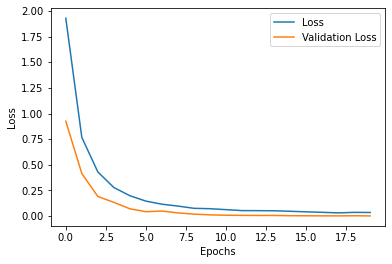

In [53]:
a = testMod2bHist.history['loss']
b = testMod2bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [54]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod2b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 135us/sample - loss: 0.5695 - acc: 0.8756
Test accuracy for this model is 0.8756274580955505


In [55]:
#initialize data for new data frame row
new_row = {'test': ['2b: 20% DO'],
                'training loss': [testMod2bHist.history['loss'][-1]],
              'training acc': [testMod2bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,Multilayer Perceptron,0.001532,1.000000,0.834670,0.827245
1,LeNet original,0.000058,1.000000,0.807563,0.868935
2,vgg16 reshaped,3.177472,0.044728,3.199315,0.034300
3,1a: 10% DO,0.018993,0.994901,0.656520,0.877440
4,1b: 20% DO,0.018041,0.994706,0.541907,0.865588
5,2a: 10% DO,0.020911,0.993055,0.781442,0.855689
6,2b: 20% DO,0.035355,0.988733,0.569484,0.875627


### 20% DO performed better than 10% DO

### Test #3
- add best performing DO layers together
- 10% DO after first pooling
- 20% DO after second pooling

In [56]:
# LeNet model with 10 % dropoout after second pooling
def testModel_3():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.1, seed = SEED)(out) # randomly sets 10% of data values to 0
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2, seed = SEED)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod3 = testModel_3()
opt = keras.optimizers.Adam()
testMod3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod3.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_10 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_11 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 4, 16)          0   

In [57]:
testMod3Hist = testMod3.fit(cnn_x_train, y_train, validation_split = VAL_SPLIT, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 250us/sample - loss: 2.1977 - acc: 0.3201 - val_loss: 1.1149 - val_acc: 0.6404
Epoch 2/20
20591/20591 [==============================] - 5s 227us/sample - loss: 0.9718 - acc: 0.6761 - val_loss: 0.4988 - val_acc: 0.8524
Epoch 3/20
20591/20591 [==============================] - 5s 222us/sample - loss: 0.5439 - acc: 0.8173 - val_loss: 0.2535 - val_acc: 0.9270
Epoch 4/20
20591/20591 [==============================] - 5s 226us/sample - loss: 0.3390 - acc: 0.8859 - val_loss: 0.1291 - val_acc: 0.9717
Epoch 5/20
20591/20591 [==============================] - 5s 220us/sample - loss: 0.2305 - acc: 0.9223 - val_loss: 0.0684 - val_acc: 0.9889
Epoch 6/20
20591/20591 [==============================] - 5s 223us/sample - loss: 0.1669 - acc: 0.9465 - val_loss: 0.0407 - val_acc: 0.9946
Epoch 7/20
20591/20591 [==============================] - 5s 222us/sample - loss: 0.1243 - acc: 0.9580 - val_lo

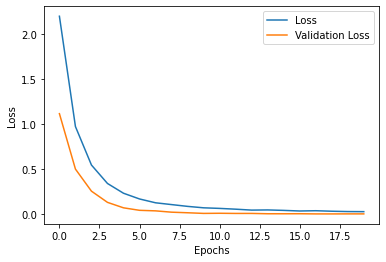

In [58]:
a = testMod3Hist.history['loss']
b = testMod3Hist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [59]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod3.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 142us/sample - loss: 0.2281 - acc: 0.9396
Test accuracy for this model is 0.9396263360977173


In [60]:
#initialize data for new data frame row
new_row = {'test': ['3: 2 DO layers'],
                'training loss': [testMod3Hist.history['loss'][-1]],
              'training acc': [testMod3Hist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,Multilayer Perceptron,0.001532,1.000000,0.834670,0.827245
1,LeNet original,0.000058,1.000000,0.807563,0.868935
2,vgg16 reshaped,3.177472,0.044728,3.199315,0.034300
3,1a: 10% DO,0.018993,0.994901,0.656520,0.877440
4,1b: 20% DO,0.018041,0.994706,0.541907,0.865588
5,2a: 10% DO,0.020911,0.993055,0.781442,0.855689
6,2b: 20% DO,0.035355,0.988733,0.569484,0.875627
7,3: 2 DO layers,0.025800,0.991695,0.228107,0.939626


### Best performance so far is with 3 - 10% DO after first pooling and 20% dropout after second pooling
### sharp increase in testing accuracy ~87 -> ~94%
### now test removing dense layers

### Test #4
- remove dense layer 1 and 2 
- combine best w/ 3

In [61]:
# LeNet model with one less dense layer (120 layer)
def testModel_4a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    
#     out = keras.layers.Dropout(rate = 0.1)(out) # randomly sets 10% of data values to 0
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#   out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    out = keras.layers.Flatten()(out)
#   out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod4a = testModel_4a()
opt = keras.optimizers.Adam()
testMod4a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod4a.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_12 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_13 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 84)                2158

In [62]:
testMod4aHist = testMod4a.fit(cnn_x_train, y_train, validation_split = VAL_SPLIT, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 209us/sample - loss: 2.0115 - acc: 0.3949 - val_loss: 1.1410 - val_acc: 0.6601
Epoch 2/20
20591/20591 [==============================] - 4s 189us/sample - loss: 0.8723 - acc: 0.7288 - val_loss: 0.6379 - val_acc: 0.7997
Epoch 3/20
20591/20591 [==============================] - 4s 191us/sample - loss: 0.4926 - acc: 0.8472 - val_loss: 0.3433 - val_acc: 0.8987
Epoch 4/20
20591/20591 [==============================] - 4s 198us/sample - loss: 0.2845 - acc: 0.9134 - val_loss: 0.2039 - val_acc: 0.9449
Epoch 5/20
20591/20591 [==============================] - 4s 193us/sample - loss: 0.1626 - acc: 0.9551 - val_loss: 0.1173 - val_acc: 0.9696
Epoch 6/20
20591/20591 [==============================] - 4s 198us/sample - loss: 0.0948 - acc: 0.9779 - val_loss: 0.0621 - val_acc: 0.9885
Epoch 7/20
20591/20591 [==============================] - 4s 190us/sample - loss: 0.0586 - acc: 0.9883 - val_lo

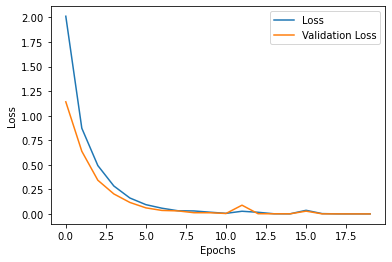

In [63]:
a = testMod4aHist.history['loss']
b = testMod4aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [64]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod4a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 146us/sample - loss: 0.8610 - acc: 0.8486
Test accuracy for this model is 0.8485777974128723


In [65]:
#initialize data for new data frame row
new_row = {'test': ['4a: remove 120 dense'],
                'training loss': [testMod4aHist.history['loss'][-1]],
              'training acc': [testMod4aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,Multilayer Perceptron,0.001532,1.000000,0.834670,0.827245
1,LeNet original,0.000058,1.000000,0.807563,0.868935
2,vgg16 reshaped,3.177472,0.044728,3.199315,0.034300
3,1a: 10% DO,0.018993,0.994901,0.656520,0.877440
4,1b: 20% DO,0.018041,0.994706,0.541907,0.865588
5,2a: 10% DO,0.020911,0.993055,0.781442,0.855689
6,2b: 20% DO,0.035355,0.988733,0.569484,0.875627
7,3: 2 DO layers,0.025800,0.991695,0.228107,0.939626
8,4a: remove 120 dense,0.000598,1.000000,0.860999,0.848578


In [66]:
# LeNet model with one less dense layer
def testModel_4b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    
#   out = keras.layers.Dropout(rate = 0.1)(out) # randomly sets 10% of data values to 0
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#   out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
#   out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod4b = testModel_4b()
opt = keras.optimizers.Adam()
testMod4b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod4b.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_14 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_15 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 120)               3084

In [67]:
testMod4bHist = testMod4b.fit(cnn_x_train, y_train, validation_split = VAL_SPLIT, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 216us/sample - loss: 1.7726 - acc: 0.4573 - val_loss: 0.9710 - val_acc: 0.6882
Epoch 2/20
20591/20591 [==============================] - 4s 201us/sample - loss: 0.6905 - acc: 0.7789 - val_loss: 0.4485 - val_acc: 0.8568
Epoch 3/20
20591/20591 [==============================] - 4s 195us/sample - loss: 0.3278 - acc: 0.9004 - val_loss: 0.2335 - val_acc: 0.9312
Epoch 4/20
20591/20591 [==============================] - 4s 187us/sample - loss: 0.1438 - acc: 0.9621 - val_loss: 0.0895 - val_acc: 0.9818
Epoch 5/20
20591/20591 [==============================] - 4s 191us/sample - loss: 0.0692 - acc: 0.9860 - val_loss: 0.0681 - val_acc: 0.9799
Epoch 6/20
20591/20591 [==============================] - 4s 187us/sample - loss: 0.0454 - acc: 0.9913 - val_loss: 0.0292 - val_acc: 0.9959
Epoch 7/20
20591/20591 [==============================] - 4s 202us/sample - loss: 0.0182 - acc: 0.9978 - val_lo

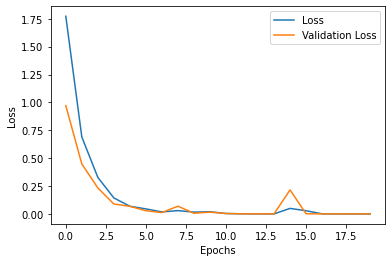

In [68]:
a = testMod4bHist.history['loss']
b = testMod4bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [69]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod4b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 153us/sample - loss: 0.7435 - acc: 0.8795
Test accuracy for this model is 0.8795315027236938


In [70]:
#initialize data for new data frame row
new_row = {'test': ['4b: remove 84 dense'],
                'training loss': [testMod4bHist.history['loss'][-1]],
              'training acc': [testMod4bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,Multilayer Perceptron,0.001532,1.000000,0.834670,0.827245
1,LeNet original,0.000058,1.000000,0.807563,0.868935
2,vgg16 reshaped,3.177472,0.044728,3.199315,0.034300
3,1a: 10% DO,0.018993,0.994901,0.656520,0.877440
4,1b: 20% DO,0.018041,0.994706,0.541907,0.865588
5,2a: 10% DO,0.020911,0.993055,0.781442,0.855689
6,2b: 20% DO,0.035355,0.988733,0.569484,0.875627
7,3: 2 DO layers,0.025800,0.991695,0.228107,0.939626
8,4a: remove 120 dense,0.000598,1.000000,0.860999,0.848578
9,4b: remove 84 dense,0.000401,1.000000,0.743542,0.879532


### Removing the 84 Dense layer performed better than removing the 120 Dense layer

In [71]:
# LeNet model with removed 84 output dense layer and 2 dropout layers
def testModel_4c():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    
    out = keras.layers.Dropout(rate = 0.1, seed = SEED)(out) # randomly sets 10% of data values to 0
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2, seed = SEED)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
#   out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod4c = testModel_4c()
opt = keras.optimizers.Adam()
testMod4c.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod4c.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_16 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_17 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 4, 16)          0  

In [72]:
testMod4cHist = testMod4c.fit(cnn_x_train, y_train, validation_split = VAL_SPLIT, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 249us/sample - loss: 1.9775 - acc: 0.3985 - val_loss: 1.0290 - val_acc: 0.6811
Epoch 2/20
20591/20591 [==============================] - 5s 233us/sample - loss: 0.8915 - acc: 0.7102 - val_loss: 0.4653 - val_acc: 0.8682
Epoch 3/20
20591/20591 [==============================] - 5s 219us/sample - loss: 0.5249 - acc: 0.8257 - val_loss: 0.2423 - val_acc: 0.9403
Epoch 4/20
20591/20591 [==============================] - 4s 212us/sample - loss: 0.3434 - acc: 0.8854 - val_loss: 0.1499 - val_acc: 0.9628
Epoch 5/20
20591/20591 [==============================] - 5s 222us/sample - loss: 0.2432 - acc: 0.9223 - val_loss: 0.0888 - val_acc: 0.9882
Epoch 6/20
20591/20591 [==============================] - 5s 219us/sample - loss: 0.1751 - acc: 0.9448 - val_loss: 0.0600 - val_acc: 0.9908
Epoch 7/20
20591/20591 [==============================] - 4s 210us/sample - loss: 0.1389 - acc: 0.9556 - val_lo

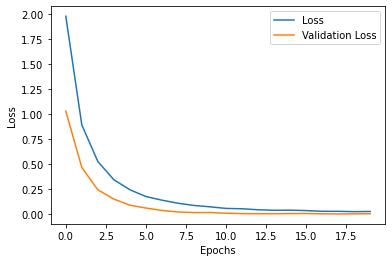

In [73]:
a = testMod4cHist.history['loss']
b = testMod4cHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [74]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod4c.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 159us/sample - loss: 0.3713 - acc: 0.9176
Test accuracy for this model is 0.9175962209701538


In [78]:
#initialize data for new data frame row
new_row = {'test': ['4c: remove 84 dense, add 2 DO layers'],
                'training loss': [testMod4cHist.history['loss'][-1]],
              'training acc': [testMod4cHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,Multilayer Perceptron,0.001532,1.000000,0.834670,0.827245
1,LeNet original,0.000058,1.000000,0.807563,0.868935
2,vgg16 reshaped,3.177472,0.044728,3.199315,0.034300
3,1a: 10% DO,0.018993,0.994901,0.656520,0.877440
4,1b: 20% DO,0.018041,0.994706,0.541907,0.865588
5,2a: 10% DO,0.020911,0.993055,0.781442,0.855689
6,2b: 20% DO,0.035355,0.988733,0.569484,0.875627
7,3: 2 DO layers,0.025800,0.991695,0.228107,0.939626
8,4a: remove 120 dense,0.000598,1.000000,0.860999,0.848578
9,4b: remove 84 dense,0.000401,1.000000,0.743542,0.879532


## combination of dropped dense layer and dropout not as good as dropout alone

### Test #5
- add extra convolution layer before pooling
- combine it with dropout
- combine with dropout and dense layer missing

In [79]:
# LeNet model with additional convolution layer
def testModel_5a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    
#   out = keras.layers.Dropout(rate = 0.1)(out) # randomly sets 20% of data values to 0    

    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.Conv2D(32, 5, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#   out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod5a = testModel_5a()
opt = keras.optimizers.Adam()
testMod5a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod5a.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_18 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 4, 4, 32)          12832     
_________________________________________________________________
average_pooling2d_19 (Averag (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 128)               0  

In [80]:
testMod5aHist = testMod5a.fit(cnn_x_train, y_train, validation_split = VAL_SPLIT, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 6s 283us/sample - loss: 1.7460 - acc: 0.4458 - val_loss: 0.8598 - val_acc: 0.7172
Epoch 2/20
20591/20591 [==============================] - 5s 231us/sample - loss: 0.5917 - acc: 0.8049 - val_loss: 0.3196 - val_acc: 0.9030
Epoch 3/20
20591/20591 [==============================] - 5s 224us/sample - loss: 0.2452 - acc: 0.9187 - val_loss: 0.1906 - val_acc: 0.9337
Epoch 4/20
20591/20591 [==============================] - 5s 235us/sample - loss: 0.1209 - acc: 0.9616 - val_loss: 0.0862 - val_acc: 0.9723
Epoch 5/20
20591/20591 [==============================] - 5s 234us/sample - loss: 0.0620 - acc: 0.9823 - val_loss: 0.0260 - val_acc: 0.9932
Epoch 6/20
20591/20591 [==============================] - 5s 228us/sample - loss: 0.0504 - acc: 0.9845 - val_loss: 0.0337 - val_acc: 0.9910
Epoch 7/20
20591/20591 [==============================] - 5s 234us/sample - loss: 0.0441 - acc: 0.9868 - val_lo

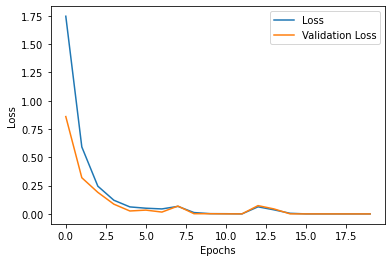

In [81]:
a = testMod5aHist.history['loss']
b = testMod5aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [82]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod5a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 182us/sample - loss: 0.8428 - acc: 0.8779
Test accuracy for this model is 0.8778583407402039


In [83]:
#initialize data for new data frame row
new_row = {'test': ['5a: Add Conv 32 out'],
                'training loss': [testMod5aHist.history['loss'][-1]],
              'training acc': [testMod5aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,Multilayer Perceptron,0.001532,1.000000,0.834670,0.827245
1,LeNet original,0.000058,1.000000,0.807563,0.868935
2,vgg16 reshaped,3.177472,0.044728,3.199315,0.034300
3,1a: 10% DO,0.018993,0.994901,0.656520,0.877440
4,1b: 20% DO,0.018041,0.994706,0.541907,0.865588
5,2a: 10% DO,0.020911,0.993055,0.781442,0.855689
6,2b: 20% DO,0.035355,0.988733,0.569484,0.875627
7,3: 2 DO layers,0.025800,0.991695,0.228107,0.939626
8,4a: remove 120 dense,0.000598,1.000000,0.860999,0.848578
9,4b: remove 84 dense,0.000401,1.000000,0.743542,0.879532


In [84]:
#5b combine convolutional layer with both dropout layers
# LeNet model with additional convolution layer and 2 DO layers
def testModel_5b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    
    out = keras.layers.Dropout(rate = 0.1, seed = SEED)(out) # randomly sets 10% of data values to 0
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.Conv2D(32, 5, activation='relu')(out) #additional convolution layer

    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2, seed = SEED)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod5b = testModel_5b()
opt = keras.optimizers.Adam()
testMod5b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod5b.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_20 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 4, 4, 32)          12832     
_________________________________________________________________
average_pooling2d_21 (Averag (None, 2, 2, 32)          0  

In [85]:
testMod5bHist = testMod5b.fit(cnn_x_train, y_train, validation_split = VAL_SPLIT, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 6s 277us/sample - loss: 2.0226 - acc: 0.3550 - val_loss: 0.9596 - val_acc: 0.6951
Epoch 2/20
20591/20591 [==============================] - 5s 251us/sample - loss: 0.8993 - acc: 0.6913 - val_loss: 0.4416 - val_acc: 0.8568
Epoch 3/20
20591/20591 [==============================] - 5s 243us/sample - loss: 0.5464 - acc: 0.8086 - val_loss: 0.2380 - val_acc: 0.9280
Epoch 4/20
20591/20591 [==============================] - 5s 251us/sample - loss: 0.3794 - acc: 0.8674 - val_loss: 0.1327 - val_acc: 0.9580
Epoch 5/20
20591/20591 [==============================] - 5s 243us/sample - loss: 0.2874 - acc: 0.9001 - val_loss: 0.1459 - val_acc: 0.9547
Epoch 6/20
20591/20591 [==============================] - 5s 246us/sample - loss: 0.2211 - acc: 0.9234 - val_loss: 0.0650 - val_acc: 0.9883
Epoch 7/20
20591/20591 [==============================] - 5s 248us/sample - loss: 0.1831 - acc: 0.9367 - val_lo

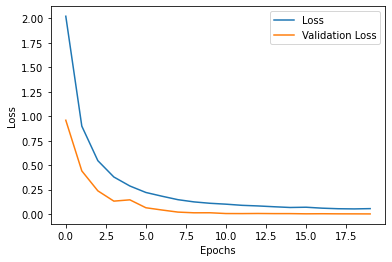

In [86]:
a = testMod5bHist.history['loss']
b = testMod5bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [87]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod5b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 163us/sample - loss: 0.3743 - acc: 0.9006
Test accuracy for this model is 0.9005855917930603


In [88]:
#initialize data for new data frame row
new_row = {'test': ['5b: Add Conv 32 out and 2 DO layers'],
                'training loss': [testMod5bHist.history['loss'][-1]],
              'training acc': [testMod5bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,Multilayer Perceptron,0.001532,1.000000,0.834670,0.827245
1,LeNet original,0.000058,1.000000,0.807563,0.868935
2,vgg16 reshaped,3.177472,0.044728,3.199315,0.034300
3,1a: 10% DO,0.018993,0.994901,0.656520,0.877440
4,1b: 20% DO,0.018041,0.994706,0.541907,0.865588
5,2a: 10% DO,0.020911,0.993055,0.781442,0.855689
6,2b: 20% DO,0.035355,0.988733,0.569484,0.875627
7,3: 2 DO layers,0.025800,0.991695,0.228107,0.939626
8,4a: remove 120 dense,0.000598,1.000000,0.860999,0.848578
9,4b: remove 84 dense,0.000401,1.000000,0.743542,0.879532


### combination of additional convolution layer and dropout not as good as dropout alone

### Test #6
- add image augmentation
- +- 5 degrees rotation
- 10% zoom
- 10% shift horizontal
- 10% shit vertical
- 10% shear

In [89]:
# use keras preprocessing to apply random image manipulations and increase model especially as it relates to location
# and rotation invariance
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
augmentedData = ImageDataGenerator(rotation_range= 10, # randomly rotate images in the range 5 degrees 
                                   zoom_range = 0.1, # Randomly zoom image 10% 
                                   width_shift_range=0.1, # randomly shift images horizontally 10%
                                   height_shift_range=0.1, # randomly shift images vertically 10% 
                                   shear_range = 0.1) #randomly distorts/shears image, value affects intensity
augmentedData.fit(cnn_x_train)
train_generator = augmentedData.flow(cnn_x_train,y_train, batch_size = BATCH_SIZE)



In [90]:
#Original LeNet model w/ data augmentation alone
def testModel_6a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    
#   out = keras.layers.Dropout(rate = 0.1)(out) # randomly sets 20% of data values to 0    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#     out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod6a = testModel_6a()
opt = keras.optimizers.Adam()
testMod6a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod6a.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_22 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_23 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 120)               308

In [91]:
#using test data as validation data because image data generator does not allow simple validation split
testMod6aHist = testMod6a.fit(train_generator, validation_data = (cnn_x_test,y_test), 
                              epochs=EPOCHS, shuffle=True, callbacks = [early_stopping, history])

Epoch 1/20
550/550 [==============================] - 12s 22ms/step - loss: 2.1332 - acc: 0.3443 - val_loss: 1.1653 - val_acc: 0.5926
Epoch 2/20
550/550 [==============================] - 11s 20ms/step - loss: 1.2161 - acc: 0.6020 - val_loss: 0.7467 - val_acc: 0.7554
Epoch 3/20
550/550 [==============================] - 11s 20ms/step - loss: 0.8293 - acc: 0.7255 - val_loss: 0.6891 - val_acc: 0.7280
Epoch 4/20
550/550 [==============================] - 11s 21ms/step - loss: 0.6121 - acc: 0.7915 - val_loss: 0.3966 - val_acc: 0.8593
Epoch 5/20
550/550 [==============================] - 11s 21ms/step - loss: 0.4650 - acc: 0.8444 - val_loss: 0.4138 - val_acc: 0.8586
Epoch 6/20
550/550 [==============================] - 11s 21ms/step - loss: 0.3646 - acc: 0.8757 - val_loss: 0.2816 - val_acc: 0.8862
Epoch 7/20
550/550 [==============================] - 11s 21ms/step - loss: 0.3143 - acc: 0.8950 - val_loss: 0.2386 - val_acc: 0.9109
Epoch 8/20
550/550 [==============================] - 12s 21ms

550/550 [==============================] - 11s 20ms/step - loss: 0.1438 - acc: 0.9518 - val_loss: 0.1257 - val_acc: 0.9617
Epoch 14/20
550/550 [==============================] - 11s 21ms/step - loss: 0.1312 - acc: 0.9573 - val_loss: 0.0710 - val_acc: 0.9760
Epoch 15/20
550/550 [==============================] - 11s 20ms/step - loss: 0.1107 - acc: 0.9636 - val_loss: 0.1234 - val_acc: 0.9605
Epoch 16/20
550/550 [==============================] - 11s 20ms/step - loss: 0.1156 - acc: 0.9608 - val_loss: 0.0807 - val_acc: 0.9777
Epoch 17/20
550/550 [==============================] - 11s 21ms/step - loss: 0.0990 - acc: 0.9669 - val_loss: 0.0580 - val_acc: 0.9792
Epoch 18/20
550/550 [==============================] - 12s 21ms/step - loss: 0.0868 - acc: 0.9711 - val_loss: 0.1242 - val_acc: 0.9679
Epoch 19/20
550/550 [==============================] - 11s 21ms/step - loss: 0.0810 - acc: 0.9742 - val_loss: 0.0908 - val_acc: 0.9739
Epoch 20/20
550/550 [==============================] - 11s 20ms/ste

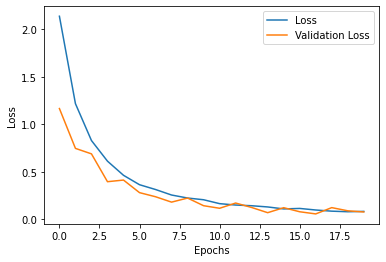

In [92]:
# testMod2aHist.history# training loss
a = testMod6aHist.history['loss']
b = testMod6aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [93]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod6a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 160us/sample - loss: 0.0785 - acc: 0.9766
Test accuracy for this model is 0.9765755534172058


In [94]:
#initialize data for new data frame row
new_row = {'test': ['6a: Add Image Aug'],
                'training loss': [testMod6aHist.history['loss'][-1]],
              'training acc': [testMod6aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,Multilayer Perceptron,0.001532,1.000000,0.834670,0.827245
1,LeNet original,0.000058,1.000000,0.807563,0.868935
2,vgg16 reshaped,3.177472,0.044728,3.199315,0.034300
3,1a: 10% DO,0.018993,0.994901,0.656520,0.877440
4,1b: 20% DO,0.018041,0.994706,0.541907,0.865588
5,2a: 10% DO,0.020911,0.993055,0.781442,0.855689
6,2b: 20% DO,0.035355,0.988733,0.569484,0.875627
7,3: 2 DO layers,0.025800,0.991695,0.228107,0.939626
8,4a: remove 120 dense,0.000598,1.000000,0.860999,0.848578
9,4b: remove 84 dense,0.000401,1.000000,0.743542,0.879532


In [95]:
#Original LeNet model w/ data augmentation and both dropout layer
def testModel_6b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    
    out = keras.layers.Dropout(rate = 0.1,seed = SEED)(out) # randomly sets 10% of data values to 0
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2,seed = SEED)(out) # randomly sets 20% of data values to 0
    
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod6b = testModel_6b()
opt = keras.optimizers.Adam()
testMod6b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod6b.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_24 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_25 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 4, 4, 16)          0  

In [96]:
testMod6bHist = testMod6b.fit(train_generator, validation_data = (cnn_x_test,y_test), 
                              epochs=EPOCHS, shuffle=True, callbacks = [early_stopping, history])

Epoch 1/20
550/550 [==============================] - 12s 22ms/step - loss: 2.1846 - acc: 0.3233 - val_loss: 1.0769 - val_acc: 0.6675
Epoch 2/20
550/550 [==============================] - 11s 20ms/step - loss: 1.2638 - acc: 0.5871 - val_loss: 0.6554 - val_acc: 0.8111
Epoch 3/20
550/550 [==============================] - 11s 21ms/step - loss: 0.9200 - acc: 0.6917 - val_loss: 0.4881 - val_acc: 0.8338
Epoch 4/20
550/550 [==============================] - 12s 21ms/step - loss: 0.7381 - acc: 0.7487 - val_loss: 0.4515 - val_acc: 0.8490
Epoch 5/20
550/550 [==============================] - 11s 21ms/step - loss: 0.6162 - acc: 0.7920 - val_loss: 0.3028 - val_acc: 0.9099
Epoch 6/20
550/550 [==============================] - 11s 21ms/step - loss: 0.5413 - acc: 0.8156 - val_loss: 0.2510 - val_acc: 0.9288
Epoch 7/20
550/550 [==============================] - 11s 19ms/step - loss: 0.4640 - acc: 0.8438 - val_loss: 0.1968 - val_acc: 0.9498
Epoch 8/20
550/550 [==============================] - 11s 21ms

550/550 [==============================] - 11s 20ms/step - loss: 0.2736 - acc: 0.9068 - val_loss: 0.0826 - val_acc: 0.9803
Epoch 14/20
550/550 [==============================] - 11s 20ms/step - loss: 0.2578 - acc: 0.9114 - val_loss: 0.0833 - val_acc: 0.9767
Epoch 15/20
550/550 [==============================] - 11s 20ms/step - loss: 0.2384 - acc: 0.9200 - val_loss: 0.1091 - val_acc: 0.9580
Epoch 16/20
550/550 [==============================] - 11s 20ms/step - loss: 0.2196 - acc: 0.9265 - val_loss: 0.0626 - val_acc: 0.9774
Epoch 17/20
550/550 [==============================] - 11s 21ms/step - loss: 0.2188 - acc: 0.9258 - val_loss: 0.0892 - val_acc: 0.9730
Epoch 18/20
550/550 [==============================] - 11s 20ms/step - loss: 0.2067 - acc: 0.9296 - val_loss: 0.0846 - val_acc: 0.9756
Epoch 19/20
550/550 [==============================] - 11s 20ms/step - loss: 0.1883 - acc: 0.9378 - val_loss: 0.0507 - val_acc: 0.9866
Epoch 20/20
550/550 [==============================] - 11s 20ms/ste

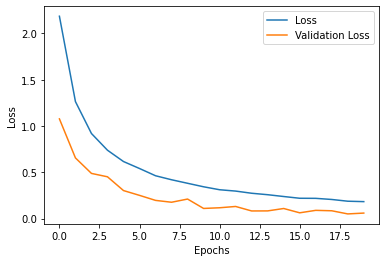

In [97]:
# testMod2aHist.history# training loss
a = testMod6bHist.history['loss']
b = testMod6bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [98]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod6b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 149us/sample - loss: 0.0597 - acc: 0.9799
Test accuracy for this model is 0.9799219369888306


In [99]:
#initialize data for new data frame row
new_row = {'test': ['6b: Add Image Aug and 2 DO layers'],
                'training loss': [testMod6bHist.history['loss'][-1]],
              'training acc': [testMod6bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,Multilayer Perceptron,0.001532,1.000000,0.834670,0.827245
1,LeNet original,0.000058,1.000000,0.807563,0.868935
2,vgg16 reshaped,3.177472,0.044728,3.199315,0.034300
3,1a: 10% DO,0.018993,0.994901,0.656520,0.877440
4,1b: 20% DO,0.018041,0.994706,0.541907,0.865588
5,2a: 10% DO,0.020911,0.993055,0.781442,0.855689
6,2b: 20% DO,0.035355,0.988733,0.569484,0.875627
7,3: 2 DO layers,0.025800,0.991695,0.228107,0.939626
8,4a: remove 120 dense,0.000598,1.000000,0.860999,0.848578
9,4b: remove 84 dense,0.000401,1.000000,0.743542,0.879532


### image augmentation with both DO layers performed better than image augmentation alone
- increased about 0.4%

### Test #7
- test hyper parameters
- learning rate, dropout rate, batch size, epochs, validation split, kernel size

In [107]:
#7a
# LeNet model with 10x learning
def testModel_7a():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 5, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    
#   out = keras.layers.Dropout(rate = 0.1)(out) # randomly sets 20% of data values to 0
    
    out = keras.layers.Conv2D(16, 5, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#     out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod7a = testModel_7a()
opt = keras.optimizers.Adam(learning_rate=0.01) #10x learning rate 0.001 -> 0.01
testMod7a.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod7a.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_30 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_31 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 120)               308

In [108]:
testMod7aHist = testMod7a.fit(cnn_x_train, y_train, validation_split = VAL_SPLIT, 
                              batch_size=BATCH_SIZE, epochs= EPOCHS, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 5s 258us/sample - loss: 1.4005 - acc: 0.5504 - val_loss: 0.3664 - val_acc: 0.8874
Epoch 2/20
20591/20591 [==============================] - 5s 220us/sample - loss: 0.1669 - acc: 0.9451 - val_loss: 0.0615 - val_acc: 0.9752
Epoch 3/20
20591/20591 [==============================] - 5s 222us/sample - loss: 0.1055 - acc: 0.9684 - val_loss: 0.1828 - val_acc: 0.9445
Epoch 4/20
20591/20591 [==============================] - 5s 224us/sample - loss: 0.0195 - acc: 0.9944 - val_loss: 3.9040e-04 - val_acc: 1.0000
Epoch 5/20
20591/20591 [==============================] - 5s 220us/sample - loss: 2.4015e-04 - acc: 1.0000 - val_loss: 1.9203e-04 - val_acc: 1.0000
Epoch 6/20
20591/20591 [==============================] - 5s 221us/sample - loss: 1.2592e-04 - acc: 1.0000 - val_loss: 1.1560e-04 - val_acc: 1.0000
Epoch 7/20
20591/20591 [==============================] - 4s 211us/sample - loss: 7.9946e-0

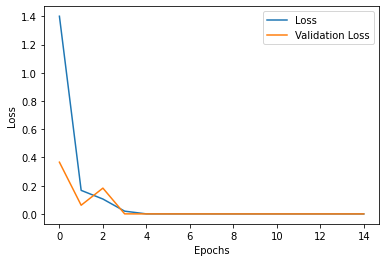

In [109]:
a = testMod7aHist.history['loss']
b = testMod7aHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [110]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod7a.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 168us/sample - loss: 1.0488 - acc: 0.8571
Test accuracy for this model is 0.8570830821990967


In [112]:
#initialize data for new data frame row
new_row = {'test': ['7a: 10x LR'],
                'training loss': [testMod7aHist.history['loss'][-1]],
              'training acc': [testMod7aHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,Multilayer Perceptron,0.001532,1.000000,0.834670,0.827245
1,LeNet original,0.000058,1.000000,0.807563,0.868935
2,vgg16 reshaped,3.177472,0.044728,3.199315,0.034300
3,1a: 10% DO,0.018993,0.994901,0.656520,0.877440
4,1b: 20% DO,0.018041,0.994706,0.541907,0.865588
5,2a: 10% DO,0.020911,0.993055,0.781442,0.855689
6,2b: 20% DO,0.035355,0.988733,0.569484,0.875627
7,3: 2 DO layers,0.025800,0.991695,0.228107,0.939626
8,4a: remove 120 dense,0.000598,1.000000,0.860999,0.848578
9,4b: remove 84 dense,0.000401,1.000000,0.743542,0.879532


### 10x increase in learning rate decreased testing accuracy 

In [105]:
#7b
# LeNet model with 3x3 kernel instead of 5x5
def testModel_7b():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 3, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    
#   out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0    
    out = keras.layers.Conv2D(16, 3, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
#     out = keras.layers.Dropout(rate = 0.2)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod7b = testModel_7b()
opt = keras.optimizers.Adam() 
testMod7b.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod7b.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_28 (Averag (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_29 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 120)               481

In [106]:
testMod7bHist = testMod7b.fit(cnn_x_train, y_train, validation_split = VAL_SPLIT, 
                              batch_size=BATCH_SIZE, epochs=EPOCHS, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 6s 277us/sample - loss: 1.9136 - acc: 0.4173 - val_loss: 1.1106 - val_acc: 0.6343
Epoch 2/20
20591/20591 [==============================] - 4s 215us/sample - loss: 0.8263 - acc: 0.7387 - val_loss: 0.5728 - val_acc: 0.8173
Epoch 3/20
20591/20591 [==============================] - 4s 210us/sample - loss: 0.3990 - acc: 0.8766 - val_loss: 0.2498 - val_acc: 0.9248
Epoch 4/20
20591/20591 [==============================] - 4s 214us/sample - loss: 0.1640 - acc: 0.9577 - val_loss: 0.1072 - val_acc: 0.9773
Epoch 5/20
20591/20591 [==============================] - 4s 208us/sample - loss: 0.0737 - acc: 0.9859 - val_loss: 0.0559 - val_acc: 0.9867
Epoch 6/20
20591/20591 [==============================] - 5s 220us/sample - loss: 0.0341 - acc: 0.9949 - val_loss: 0.0190 - val_acc: 0.9993
Epoch 7/20
20591/20591 [==============================] - 4s 216us/sample - loss: 0.0207 - acc: 0.9970 - val_lo

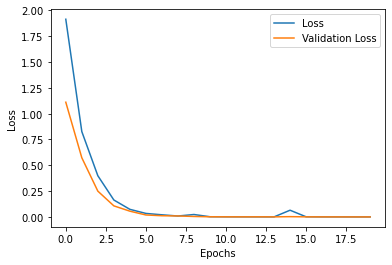

In [113]:
a = testMod7bHist.history['loss']
b = testMod7bHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [114]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod7b.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 208us/sample - loss: 0.5942 - acc: 0.8878
Test accuracy for this model is 0.8877579569816589


In [115]:
#initialize data for new data frame row
new_row = {'test': ['7b: 3x3 kernel'],
                'training loss': [testMod7bHist.history['loss'][-1]],
              'training acc': [testMod7bHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,Multilayer Perceptron,0.001532,1.000000,0.834670,0.827245
1,LeNet original,0.000058,1.000000,0.807563,0.868935
2,vgg16 reshaped,3.177472,0.044728,3.199315,0.034300
3,1a: 10% DO,0.018993,0.994901,0.656520,0.877440
4,1b: 20% DO,0.018041,0.994706,0.541907,0.865588
5,2a: 10% DO,0.020911,0.993055,0.781442,0.855689
6,2b: 20% DO,0.035355,0.988733,0.569484,0.875627
7,3: 2 DO layers,0.025800,0.991695,0.228107,0.939626
8,4a: remove 120 dense,0.000598,1.000000,0.860999,0.848578
9,4b: remove 84 dense,0.000401,1.000000,0.743542,0.879532


### 3x3 kernel performed better than 5x5 kernel in original architecture

In [116]:
#7a
# LeNet model with 3x3 kernel instead of 5x5 and additional dropout layers
def testModel_7c():
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, 3, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    
    out = keras.layers.Dropout(rate = 0.1, seed = SEED)(out) # randomly sets 20% of data values to 0
    
    out = keras.layers.Conv2D(16, 3, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = 0.2, seed = SEED)(out) # randomly sets 20% of data values to 0
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
testMod7c = testModel_7c()
opt = keras.optimizers.Adam() 
testMod7c.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
testMod7c.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_32 (Averag (None, 13, 13, 6)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_33 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 5, 5, 16)          0  

In [117]:
testMod7cHist = testMod7c.fit(cnn_x_train, y_train, validation_split = VAL_SPLIT, 
                              batch_size=BATCH_SIZE, epochs=EPOCHS, shuffle=True, callbacks = [early_stopping, history])

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 6s 304us/sample - loss: 2.2210 - acc: 0.3164 - val_loss: 1.2232 - val_acc: 0.6247
Epoch 2/20
20591/20591 [==============================] - 5s 250us/sample - loss: 1.0726 - acc: 0.6548 - val_loss: 0.5804 - val_acc: 0.8303
Epoch 3/20
20591/20591 [==============================] - 5s 250us/sample - loss: 0.6440 - acc: 0.7868 - val_loss: 0.3322 - val_acc: 0.9078
Epoch 4/20
20591/20591 [==============================] - 5s 251us/sample - loss: 0.4091 - acc: 0.8612 - val_loss: 0.1804 - val_acc: 0.9599
Epoch 5/20
20591/20591 [==============================] - 5s 250us/sample - loss: 0.2931 - acc: 0.9021 - val_loss: 0.1106 - val_acc: 0.9803
Epoch 6/20
20591/20591 [==============================] - 5s 244us/sample - loss: 0.2104 - acc: 0.9323 - val_loss: 0.0641 - val_acc: 0.9892
Epoch 7/20
20591/20591 [==============================] - 5s 254us/sample - loss: 0.1647 - acc: 0.9465 - val_lo

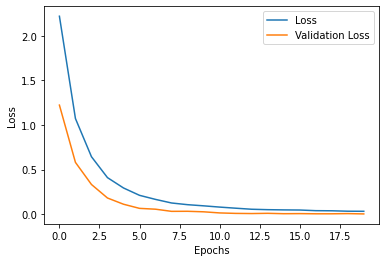

In [118]:
a = testMod7cHist.history['loss']
b = testMod7cHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

In [119]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = testMod7c.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 1s 186us/sample - loss: 0.3826 - acc: 0.9063
Test accuracy for this model is 0.906302273273468


In [120]:
#initialize data for new data frame row
new_row = {'test': ['7b: 3x3 kernel and 2 DO layers'],
                'training loss': [testMod7cHist.history['loss'][-1]],
              'training acc': [testMod7cHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,Multilayer Perceptron,0.001532,1.000000,0.834670,0.827245
1,LeNet original,0.000058,1.000000,0.807563,0.868935
2,vgg16 reshaped,3.177472,0.044728,3.199315,0.034300
3,1a: 10% DO,0.018993,0.994901,0.656520,0.877440
4,1b: 20% DO,0.018041,0.994706,0.541907,0.865588
5,2a: 10% DO,0.020911,0.993055,0.781442,0.855689
6,2b: 20% DO,0.035355,0.988733,0.569484,0.875627
7,3: 2 DO layers,0.025800,0.991695,0.228107,0.939626
8,4a: remove 120 dense,0.000598,1.000000,0.860999,0.848578
9,4b: remove 84 dense,0.000401,1.000000,0.743542,0.879532


### 2 DO layers with 5x5 kernel performed better than 2 DO layers with 3x3 kernel

In [125]:
#set 5x5 kernel for optimal model
OPTIMAL_KERNEL_SIZE = 5

# automating hyperparameter testing

- test batch sizes from 25 to 300
- test learning rate range from 0.001 to 0.01
- test both dropout rate from 10-30%

4/25
- test validation split from 15-35 %
- test epochs 20-60

Use model with 5x5 kernel size and 2 dropout layers.
Don't use image augmentation because of increased time to run each epoch and should not affect whether a hyperparameter
increass or decreases how well a model performs

save value of hyperparameter that gives highest acc


In [121]:
#set up hyperparameter lists to loop through
batch_size_range = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
learning_rate_range = [0.0010, 0.003, 0.005, 0.007, 0.01]
epoch_range = [20,30,40,50,60]
validation_split_range = [0.15,0.20,0.25,0.30, 0.35]
dropout_rate_range = [0.1, 0.15, 0.2, 0.25, 0.3] #10-35% last, use to adjust both dropout rates individually
loss = 'sparse_categorical_crossentropy'

In [126]:
# test 8
# LeNet model with adjustable drop out rates for loop
def testModel_HyperParamLoop(dropout_rate1 = 0.1, dropout_rate2 = 0.2):
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, OPTIMAL_KERNEL_SIZE, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    
    out = keras.layers.Dropout(rate = dropout_rate1, seed = SEED)(out) # updates every loop
    
    out = keras.layers.Conv2D(16, OPTIMAL_KERNEL_SIZE, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = dropout_rate2, seed = SEED)(out) # updates every loop
    
    #extra convolution and dropout?
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

In [127]:
#optimize batch size
batch_accuracies = {}
tracker = 1
#use default epochs used to train earlier models 20 epochs, 25% validation split
for batch_size in batch_size_range: 
    print("Run {} out of {}".format(tracker, len(batch_size_range)))
    tempModel = testModel_HyperParamLoop() #create temporary model with default dropouts 0.1 and 0.2
    opt = keras.optimizers.Adam()
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = VAL_SPLIT, 
                              batch_size= batch_size, epochs=EPOCHS, shuffle=True, callbacks = [early_stopping, history]) 
                            # testing range of batch sizes
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    batch_accuracies[batch_size] = [trainAcc, testAcc] #save model accuracy in dictionary
    tracker += 1

Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 11s 538us/sample - loss: 1.7710 - acc: 0.4466 - val_loss: 0.7177 - val_acc: 0.7673
Epoch 2/20
20591/20591 [==============================] - 10s 470us/sample - loss: 0.6271 - acc: 0.7891 - val_loss: 0.2492 - val_acc: 0.9397
Epoch 3/20
20591/20591 [==============================] - 10s 471us/sample - loss: 0.3276 - acc: 0.8879 - val_loss: 0.1086 - val_acc: 0.9811
Epoch 4/20
20591/20591 [==============================] - 9s 455us/sample - loss: 0.2104 - acc: 0.9301 - val_loss: 0.0673 - val_acc: 0.9881
Epoch 5/20
20591/20591 [==============================] - 9s 451us/sample - loss: 0.1485 - acc: 0.9504 - val_loss: 0.0330 - val_acc: 0.9921
Epoch 6/20
20591/20591 [==============================] - 9s 435us/sample - loss: 0.1140 - acc: 0.9633 - val_loss: 0.0211 - val_acc: 0.9968
Epoch 7/20
20591/20591 [==============================] - 9s 449us/sample - loss: 0.0931 - acc: 0.9683 - val

20591/20591 [==============================] - 4s 175us/sample - loss: 0.0470 - acc: 0.9850 - val_loss: 0.0048 - val_acc: 0.9997
Epoch 17/20
20591/20591 [==============================] - 4s 178us/sample - loss: 0.0380 - acc: 0.9875 - val_loss: 0.0027 - val_acc: 0.9997
Epoch 18/20
20591/20591 [==============================] - 4s 173us/sample - loss: 0.0357 - acc: 0.9889 - val_loss: 0.0035 - val_acc: 0.9996
Epoch 19/20
20591/20591 [==============================] - 4s 170us/sample - loss: 0.0353 - acc: 0.9894 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 20/20
7172/7172 [==============================] - 1s 169us/sample - loss: 0.3501 - acc: 0.9201
Test accuracy for this model is 0.9201059937477112
Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 4s 209us/sample - loss: 2.3710 - acc: 0.2675 - val_loss: 1.3533 - val_acc: 0.6020
Epoch 2/20
20591/20591 [==============================] - 3s 132us/sample - loss: 1.2148 - acc: 0.6018 - v

20591/20591 [==============================] - 2s 94us/sample - loss: 0.1688 - acc: 0.9447 - val_loss: 0.0528 - val_acc: 0.9933
Epoch 11/20
20591/20591 [==============================] - 2s 101us/sample - loss: 0.1427 - acc: 0.9532 - val_loss: 0.0437 - val_acc: 0.9952
Epoch 12/20
20591/20591 [==============================] - 2s 101us/sample - loss: 0.1160 - acc: 0.9628 - val_loss: 0.0282 - val_acc: 0.9956
Epoch 13/20
20591/20591 [==============================] - 2s 95us/sample - loss: 0.1078 - acc: 0.9653 - val_loss: 0.0252 - val_acc: 0.9975
Epoch 14/20
20591/20591 [==============================] - 2s 99us/sample - loss: 0.0997 - acc: 0.9679 - val_loss: 0.0233 - val_acc: 0.9987
Epoch 15/20
20591/20591 [==============================] - 2s 96us/sample - loss: 0.0861 - acc: 0.9729 - val_loss: 0.0136 - val_acc: 1.0000
Epoch 16/20
20591/20591 [==============================] - 2s 96us/sample - loss: 0.0746 - acc: 0.9762 - val_loss: 0.0119 - val_acc: 0.9999
Epoch 17/20
20591/20591 [=====

20591/20591 [==============================] - 1s 73us/sample - loss: 0.9216 - acc: 0.6957 - val_loss: 0.5516 - val_acc: 0.8397
Epoch 5/20
20591/20591 [==============================] - 1s 72us/sample - loss: 0.7078 - acc: 0.7663 - val_loss: 0.4138 - val_acc: 0.8810
Epoch 6/20
20591/20591 [==============================] - 1s 67us/sample - loss: 0.5546 - acc: 0.8164 - val_loss: 0.2921 - val_acc: 0.9307
Epoch 7/20
20591/20591 [==============================] - 1s 72us/sample - loss: 0.4319 - acc: 0.8567 - val_loss: 0.2224 - val_acc: 0.9518
Epoch 8/20
20591/20591 [==============================] - 1s 66us/sample - loss: 0.3440 - acc: 0.8844 - val_loss: 0.1446 - val_acc: 0.9714
Epoch 9/20
20591/20591 [==============================] - 1s 67us/sample - loss: 0.2854 - acc: 0.9042 - val_loss: 0.1129 - val_acc: 0.9781
Epoch 10/20
20591/20591 [==============================] - 1s 72us/sample - loss: 0.2453 - acc: 0.9197 - val_loss: 0.0857 - val_acc: 0.9875
Epoch 11/20
20591/20591 [============

7172/7172 [==============================] - 1s 186us/sample - loss: 0.4238 - acc: 0.8811
Test accuracy for this model is 0.8810652494430542
Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 3s 143us/sample - loss: 2.8249 - acc: 0.1545 - val_loss: 2.0010 - val_acc: 0.3588
Epoch 2/20
20591/20591 [==============================] - 1s 56us/sample - loss: 1.8292 - acc: 0.4223 - val_loss: 1.2926 - val_acc: 0.5947
Epoch 3/20
20591/20591 [==============================] - 1s 56us/sample - loss: 1.3725 - acc: 0.5570 - val_loss: 0.9241 - val_acc: 0.7188
Epoch 4/20
20591/20591 [==============================] - 1s 57us/sample - loss: 1.0965 - acc: 0.6434 - val_loss: 0.7165 - val_acc: 0.7991
Epoch 5/20
20591/20591 [==============================] - 1s 58us/sample - loss: 0.8939 - acc: 0.7017 - val_loss: 0.5683 - val_acc: 0.8380
Epoch 6/20
20591/20591 [==============================] - 1s 57us/sample - loss: 0.7417 - acc: 0.7566 - val_loss: 

In [128]:
'''Retrieves the key associated with a specific testing accuracy in the dictionary
There is an astronomically small chance that two testing accuracies could match, but this
function should work as intended'''
def GetKey(acc_dict,val):
    for key, value in acc_dict.items():
        if val == value[1]:
            return key

In [158]:
'''Previous notebooks were incorrectly retrieving max testing accuracy, instead 
retrieving the testing accuracy associated with the run with the highest training OR testing accuracy
Now, getMaxTestAcc properly retrieves max testing accuracy through a simple loop that compares the 
testing accuracies for each run
'''
def getMaxTestAcc(acc_dict):
    max_test_acc = 0
    for value in acc_dict.values():
#         print(value)
        if value[1] > max_test_acc: #compare current runs test acc to current maximum
            max_test_acc = value[1] #set new current maximum if current run is higher
        else:
            pass #don't change maximum if it is <=
    
    return max_test_acc
        
# getMaxTestAcc(batch_accuracies)
# GetKey(batch_accuracies,getMaxTestAcc(batch_accuracies)) test to see if function works properly

In [159]:
# get optimal batch size via max test accuracy
# print(batch_accuracies)
max_test_acc = getMaxTestAcc(batch_accuracies)
OPTIMAL_BATCH_SIZE = GetKey(batch_accuracies, max_test_acc)
print('Optimal batch size is {}'.format(OPTIMAL_BATCH_SIZE) )

Optimal batch size is 50


In [176]:
#show results from loop to check results are accurate
batch_accuracies

{25: [0.99222964, 0.91160065],
 50: [0.9920839, 0.9295873],
 75: [0.99052984, 0.920106],
 100: [0.98756737, 0.9143893],
 125: [0.9863047, 0.89082545],
 150: [0.98572195, 0.9290296],
 175: [0.9782915, 0.90072507],
 200: [0.97892284, 0.9097881],
 225: [0.9787771, 0.8975181],
 250: [0.9741635, 0.8920803],
 275: [0.9751348, 0.88106525],
 300: [0.96056527, 0.88971]}

In [160]:
# optimize learning rate
learning_rates = {}
tracker = 1
for learning_rate in learning_rate_range: 
    print("Run {} out of {}".format(tracker, len(learning_rate_range)))
    tempModel = testModel_HyperParamLoop() #create temporary model with default 0.1 and 0.2 dropout
    opt = keras.optimizers.Adam(learning_rate= learning_rate) #update learning rate each loop
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = VAL_SPLIT, 
                              batch_size= OPTIMAL_BATCH_SIZE, epochs=EPOCHS, shuffle=True, callbacks = [early_stopping, history]) 
                            # testing range of batch sizes
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    learning_rates[learning_rate] = [trainAcc, testAcc] #save model accuracy in dictionary
    tracker += 1

Run 1 out of 5
Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 7s 329us/sample - loss: 2.1567 - acc: 0.3340 - val_loss: 1.0603 - val_acc: 0.6591
Epoch 2/20
20591/20591 [==============================] - 5s 258us/sample - loss: 0.8899 - acc: 0.7041 - val_loss: 0.4302 - val_acc: 0.8693
Epoch 3/20
20591/20591 [==============================] - 5s 263us/sample - loss: 0.4767 - acc: 0.8373 - val_loss: 0.2080 - val_acc: 0.9470
Epoch 4/20
20591/20591 [==============================] - 5s 263us/sample - loss: 0.2942 - acc: 0.9015 - val_loss: 0.1056 - val_acc: 0.9835
Epoch 5/20
20591/20591 [==============================] - 5s 264us/sample - loss: 0.2045 - acc: 0.9323 - val_loss: 0.0633 - val_acc: 0.9875
Epoch 6/20
20591/20591 [==============================] - 5s 264us/sample - loss: 0.1525 - acc: 0.9487 - val_loss: 0.0391 - val_acc: 0.9959
Epoch 7/20
20591/20591 [==============================] - 6s 268us/sample - loss: 0.1244 - acc: 

Epoch 16/20
20591/20591 [==============================] - 6s 274us/sample - loss: 0.0603 - acc: 0.9827 - val_loss: 0.0172 - val_acc: 0.9946
Epoch 17/20
20591/20591 [==============================] - 6s 270us/sample - loss: 0.0659 - acc: 0.9797 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 18/20
20591/20591 [==============================] - 6s 271us/sample - loss: 0.0730 - acc: 0.9792 - val_loss: 0.0012 - val_acc: 0.9999
Epoch 19/20
20591/20591 [==============================] - 6s 270us/sample - loss: 0.0669 - acc: 0.9798 - val_loss: 3.7658e-04 - val_acc: 1.0000
Epoch 20/20
7172/7172 [==============================] - 2s 209us/sample - loss: 0.4199 - acc: 0.9133
Test accuracy for this model is 0.9132738709449768
Run 4 out of 5
Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 8s 367us/sample - loss: 1.1566 - acc: 0.6136 - val_loss: 0.2487 - val_acc: 0.9266
Epoch 2/20
20591/20591 [==============================] - 6s 272us/sample -

In [161]:
# get optimal learning rate via max test accuracy
# print(learning_rates)
max_test_acc = getMaxTestAcc(learning_rates)
OPTIMAL_LEARNING_RATE = GetKey(learning_rates, max_test_acc)
opt = keras.optimizers.Adam(learning_rate = OPTIMAL_LEARNING_RATE) # set SGD optimization with optimal lr
print('Optimal learning rate is {}'.format(OPTIMAL_LEARNING_RATE))

Optimal learning rate is 0.001


In [177]:
#show results from loop to check results are accurate
learning_rates

{0.001: [0.9905784, 0.937256],
 0.003: [0.9908698, 0.923034],
 0.005: [0.98183674, 0.9132739],
 0.007: [0.9795542, 0.89347464],
 0.01: [0.044096936, 0.029141104]}

In [163]:
# optimize epochs
epochs_dict = {}
tracker = 1
for epoch_len in epoch_range:
    print("Run {} out of {}".format(tracker, len(epoch_range)))
    tempModel = testModel_HyperParamLoop() #create temporary model
    opt = keras.optimizers.Adam(learning_rate= OPTIMAL_LEARNING_RATE)
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    #fit model with optimal batch size
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = VAL_SPLIT, 
                              batch_size= OPTIMAL_BATCH_SIZE, epochs=epoch_len, shuffle=True, callbacks = [early_stopping, history])
                                
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    epochs_dict[epoch_len] = [trainAcc, testAcc] #save model accuracy in dictionary
    tracker += 1 

Run 1 out of 5
Train on 20591 samples, validate on 6864 samples
Epoch 1/20
20591/20591 [==============================] - 7s 335us/sample - loss: 2.1367 - acc: 0.3425 - val_loss: 1.0362 - val_acc: 0.6823
Epoch 2/20
20591/20591 [==============================] - 5s 259us/sample - loss: 0.8672 - acc: 0.7143 - val_loss: 0.4369 - val_acc: 0.8596
Epoch 3/20
20591/20591 [==============================] - 5s 256us/sample - loss: 0.4623 - acc: 0.8441 - val_loss: 0.1978 - val_acc: 0.9595
Epoch 4/20
20591/20591 [==============================] - 5s 250us/sample - loss: 0.2903 - acc: 0.9019 - val_loss: 0.0966 - val_acc: 0.9821
Epoch 5/20
20591/20591 [==============================] - 5s 257us/sample - loss: 0.2016 - acc: 0.9325 - val_loss: 0.0608 - val_acc: 0.9865
Epoch 6/20
20591/20591 [==============================] - 5s 254us/sample - loss: 0.1461 - acc: 0.9521 - val_loss: 0.0394 - val_acc: 0.9913
Epoch 7/20
20591/20591 [==============================] - 5s 259us/sample - loss: 0.1155 - acc: 

20591/20591 [==============================] - 5s 258us/sample - loss: 0.1870 - acc: 0.9381 - val_loss: 0.0521 - val_acc: 0.9927
Epoch 6/40
20591/20591 [==============================] - 5s 259us/sample - loss: 0.1308 - acc: 0.9573 - val_loss: 0.0289 - val_acc: 0.9968
Epoch 7/40
20591/20591 [==============================] - 5s 257us/sample - loss: 0.1008 - acc: 0.9682 - val_loss: 0.0207 - val_acc: 0.9983
Epoch 8/40
20591/20591 [==============================] - 5s 256us/sample - loss: 0.0891 - acc: 0.9706 - val_loss: 0.0149 - val_acc: 0.9980
Epoch 9/40
20591/20591 [==============================] - 5s 264us/sample - loss: 0.0616 - acc: 0.9816 - val_loss: 0.0125 - val_acc: 0.9975
Epoch 10/40
20591/20591 [==============================] - 6s 276us/sample - loss: 0.0618 - acc: 0.9798 - val_loss: 0.0104 - val_acc: 0.9974
Epoch 11/40
20591/20591 [==============================] - 6s 281us/sample - loss: 0.0548 - acc: 0.9829 - val_loss: 0.0048 - val_acc: 1.0000
Epoch 12/40
20591/20591 [====

20591/20591 [==============================] - 6s 274us/sample - loss: 0.0279 - acc: 0.9920 - val_loss: 8.7317e-04 - val_acc: 1.0000
Epoch 22/50
20591/20591 [==============================] - 6s 276us/sample - loss: 0.0205 - acc: 0.9935 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 23/50
20591/20591 [==============================] - 6s 272us/sample - loss: 0.0230 - acc: 0.9927 - val_loss: 0.0043 - val_acc: 0.9980
Epoch 24/50
20591/20591 [==============================] - 6s 273us/sample - loss: 0.0250 - acc: 0.9920 - val_loss: 7.2860e-04 - val_acc: 1.0000
Epoch 25/50
20591/20591 [==============================] - 6s 275us/sample - loss: 0.0222 - acc: 0.9927 - val_loss: 7.6463e-04 - val_acc: 1.0000
Epoch 26/50
20591/20591 [==============================] - 6s 279us/sample - loss: 0.0182 - acc: 0.9945 - val_loss: 6.3865e-04 - val_acc: 0.9999
Epoch 27/50
20591/20591 [==============================] - 6s 277us/sample - loss: 0.0164 - acc: 0.9953 - val_loss: 0.0013 - val_acc: 0.9997
Epoch 28/

20591/20591 [==============================] - 6s 278us/sample - loss: 0.0173 - acc: 0.9944 - val_loss: 0.0022 - val_acc: 0.9991
Epoch 28/60
20591/20591 [==============================] - 6s 281us/sample - loss: 0.0176 - acc: 0.9942 - val_loss: 0.0015 - val_acc: 0.9996
Epoch 29/60
20591/20591 [==============================] - 6s 277us/sample - loss: 0.0168 - acc: 0.9948 - val_loss: 2.1269e-04 - val_acc: 1.0000
Epoch 30/60
20591/20591 [==============================] - 6s 279us/sample - loss: 0.0162 - acc: 0.9945 - val_loss: 4.7787e-04 - val_acc: 1.0000
Epoch 31/60
20591/20591 [==============================] - 6s 276us/sample - loss: 0.0126 - acc: 0.9964 - val_loss: 1.4604e-04 - val_acc: 1.0000
Epoch 32/60
20591/20591 [==============================] - 6s 270us/sample - loss: 0.0168 - acc: 0.9948 - val_loss: 2.8117e-04 - val_acc: 1.0000
Epoch 33/60
20591/20591 [==============================] - 6s 283us/sample - loss: 0.0136 - acc: 0.9955 - val_loss: 2.1997e-04 - val_acc: 1.0000
Epoch

In [164]:
# get optimal epoch length via max test accuracy
max_test_acc = getMaxTestAcc(epochs_dict)
OPTIMAL_EPOCH_LEN = GetKey(epochs_dict, max_test_acc)
print('Optimal epoch_len is {}'.format(OPTIMAL_EPOCH_LEN))

Optimal epoch_len is 50


In [178]:
#show results from loop to check results are accurate
epochs_dict

{20: [0.9918411, 0.9287507],
 30: [0.99358946, 0.90923035],
 40: [0.99587196, 0.9100669],
 50: [0.9967461, 0.94004464],
 60: [0.99660045, 0.9322365]}

In [166]:
# optimize validation split
val_split_rates = {}
tracker = 1 
for val_split in validation_split_range:
    print("Run {} out of {}".format(tracker, len(validation_split_range)))
    tempModel = testModel_HyperParamLoop() #create temporary model
    opt = keras.optimizers.Adam(learning_rate= OPTIMAL_LEARNING_RATE)
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    #fit model with optimal batch size
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = val_split, 
                              batch_size= OPTIMAL_BATCH_SIZE, epochs=OPTIMAL_EPOCH_LEN, shuffle=True,
                              callbacks = [early_stopping, history])
                                
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    val_split_rates[val_split] = [trainAcc, testAcc] #save model accuracy in dictionary
    tracker += 1

Run 1 out of 5
Train on 23336 samples, validate on 4119 samples
Epoch 1/50
23336/23336 [==============================] - 9s 375us/sample - loss: 1.9445 - acc: 0.3972 - val_loss: 0.8750 - val_acc: 0.7295
Epoch 2/50
23336/23336 [==============================] - 6s 254us/sample - loss: 0.7501 - acc: 0.7526 - val_loss: 0.3406 - val_acc: 0.9068
Epoch 3/50
23336/23336 [==============================] - 6s 255us/sample - loss: 0.3950 - acc: 0.8655 - val_loss: 0.1498 - val_acc: 0.9658
Epoch 4/50
23336/23336 [==============================] - 6s 240us/sample - loss: 0.2520 - acc: 0.9155 - val_loss: 0.0813 - val_acc: 0.9874
Epoch 5/50
23336/23336 [==============================] - 6s 236us/sample - loss: 0.1752 - acc: 0.9424 - val_loss: 0.0448 - val_acc: 0.9954
Epoch 6/50
23336/23336 [==============================] - 6s 252us/sample - loss: 0.1312 - acc: 0.9570 - val_loss: 0.0342 - val_acc: 0.9954
Epoch 7/50
23336/23336 [==============================] - 6s 242us/sample - loss: 0.0998 - acc: 

21964/21964 [==============================] - 6s 274us/sample - loss: 0.1806 - acc: 0.9388 - val_loss: 0.0542 - val_acc: 0.9894
Epoch 7/50
21964/21964 [==============================] - 6s 266us/sample - loss: 0.1422 - acc: 0.9526 - val_loss: 0.0289 - val_acc: 0.9942
Epoch 8/50
21964/21964 [==============================] - 6s 272us/sample - loss: 0.1150 - acc: 0.9617 - val_loss: 0.0235 - val_acc: 0.9967
Epoch 9/50
21964/21964 [==============================] - 6s 273us/sample - loss: 0.0900 - acc: 0.9700 - val_loss: 0.0229 - val_acc: 0.9951
Epoch 10/50
21964/21964 [==============================] - 6s 267us/sample - loss: 0.0833 - acc: 0.9722 - val_loss: 0.0121 - val_acc: 0.9998
Epoch 11/50
21964/21964 [==============================] - 6s 260us/sample - loss: 0.0657 - acc: 0.9788 - val_loss: 0.0110 - val_acc: 0.9985
Epoch 12/50
21964/21964 [==============================] - 6s 267us/sample - loss: 0.0574 - acc: 0.9812 - val_loss: 0.0096 - val_acc: 0.9982
Epoch 13/50
21964/21964 [===

20591/20591 [==============================] - 6s 284us/sample - loss: 0.0385 - acc: 0.9877 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 17/50
20591/20591 [==============================] - 6s 274us/sample - loss: 0.0338 - acc: 0.9891 - val_loss: 0.0057 - val_acc: 0.9988
Epoch 18/50
20591/20591 [==============================] - 6s 278us/sample - loss: 0.0322 - acc: 0.9897 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 19/50
20591/20591 [==============================] - 6s 272us/sample - loss: 0.0310 - acc: 0.9896 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 20/50
20591/20591 [==============================] - 6s 289us/sample - loss: 0.0308 - acc: 0.9899 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 21/50
20591/20591 [==============================] - 6s 292us/sample - loss: 0.0269 - acc: 0.9915 - val_loss: 0.0027 - val_acc: 0.9999
Epoch 22/50
20591/20591 [==============================] - 6s 287us/sample - loss: 0.0233 - acc: 0.9923 - val_loss: 6.9896e-04 - val_acc: 1.0000
Epoch 23/50
20591/205

19218/19218 [==============================] - 6s 287us/sample - loss: 0.0232 - acc: 0.9927 - val_loss: 5.7309e-04 - val_acc: 1.0000
Epoch 29/50
19218/19218 [==============================] - 6s 288us/sample - loss: 0.0196 - acc: 0.9940 - val_loss: 0.0024 - val_acc: 0.9993
Epoch 30/50
19218/19218 [==============================] - 5s 275us/sample - loss: 0.0151 - acc: 0.9951 - val_loss: 0.0026 - val_acc: 0.9992
Epoch 31/50
19218/19218 [==============================] - 5s 281us/sample - loss: 0.0227 - acc: 0.9928 - val_loss: 9.6304e-04 - val_acc: 1.0000
Epoch 32/50
19218/19218 [==============================] - 6s 292us/sample - loss: 0.0163 - acc: 0.9951 - val_loss: 5.0406e-04 - val_acc: 1.0000
Epoch 33/50
19218/19218 [==============================] - 6s 299us/sample - loss: 0.0166 - acc: 0.9943 - val_loss: 3.6084e-04 - val_acc: 1.0000
Epoch 34/50
19218/19218 [==============================] - 6s 292us/sample - loss: 0.0165 - acc: 0.9950 - val_loss: 0.0014 - val_acc: 0.9998
Epoch 35/

17845/17845 [==============================] - 5s 305us/sample - loss: 0.0185 - acc: 0.9944 - val_loss: 5.1006e-04 - val_acc: 1.0000
Epoch 35/50
17845/17845 [==============================] - 5s 297us/sample - loss: 0.0176 - acc: 0.9943 - val_loss: 0.0026 - val_acc: 0.9992
Epoch 36/50
17845/17845 [==============================] - 5s 301us/sample - loss: 0.0165 - acc: 0.9946 - val_loss: 3.2935e-04 - val_acc: 0.9999
Epoch 37/50
17845/17845 [==============================] - 5s 303us/sample - loss: 0.0165 - acc: 0.9946 - val_loss: 0.0027 - val_acc: 0.9989
Epoch 38/50
17845/17845 [==============================] - 6s 309us/sample - loss: 0.0173 - acc: 0.9950 - val_loss: 9.1816e-04 - val_acc: 0.9999
Epoch 39/50
17845/17845 [==============================] - 6s 314us/sample - loss: 0.0184 - acc: 0.9943 - val_loss: 0.0017 - val_acc: 0.9998
Epoch 40/50
7172/7172 [==============================] - 2s 217us/sample - loss: 0.4317 - acc: 0.9130
Test accuracy for this model is 0.9129949808120728


In [179]:
# get optimal validation split % via max test accuracy
max_test_acc = getMaxTestAcc(val_split_rates)
OPTIMAL_VAL_SPLIT = GetKey(val_split_rates, max_test_acc)
print('Optimal validation split percent is {}'.format(OPTIMAL_VAL_SPLIT))

Optimal validation split percent is 0.3


In [180]:
#show results from loop to check results are accurate
val_split_rates

{0.15: [0.99888587, 0.9263804],
 0.2: [0.9966764, 0.9344674],
 0.25: [0.99650335, 0.91522586],
 0.3: [0.997034, 0.94868934],
 0.35: [0.99478847, 0.912995]}

In [170]:
#optimize dropout rate after first pooling layer, still using 20% after second pooling

dropout_rates1 = {}
tracker = 1

for dropout in dropout_rate_range:
    print("Run {} out of {}".format(tracker, len(dropout_rate_range)))
    tempModel = testModel_HyperParamLoop(dropout_rate1 = dropout) #create temporary model
    opt = keras.optimizers.Adam(learning_rate= OPTIMAL_LEARNING_RATE)
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    #fit model with optimal batch size
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = OPTIMAL_VAL_SPLIT, 
                              batch_size= OPTIMAL_BATCH_SIZE, epochs=OPTIMAL_EPOCH_LEN, shuffle=True, 
                              callbacks = [early_stopping, history])
                                
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    dropout_rates1[dropout] = [trainAcc, testAcc] #save model accuracy in dictionary
    tracker += 1

Run 1 out of 5
Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 7s 390us/sample - loss: 2.0676 - acc: 0.3659 - val_loss: 1.0213 - val_acc: 0.6895
Epoch 2/50
19218/19218 [==============================] - 6s 293us/sample - loss: 0.8666 - acc: 0.7127 - val_loss: 0.4917 - val_acc: 0.8417
Epoch 3/50
19218/19218 [==============================] - 6s 295us/sample - loss: 0.4926 - acc: 0.8326 - val_loss: 0.2222 - val_acc: 0.9472
Epoch 4/50
19218/19218 [==============================] - 6s 298us/sample - loss: 0.3146 - acc: 0.8938 - val_loss: 0.1330 - val_acc: 0.9715
Epoch 5/50
19218/19218 [==============================] - 6s 291us/sample - loss: 0.2169 - acc: 0.9283 - val_loss: 0.0731 - val_acc: 0.9849
Epoch 6/50
19218/19218 [==============================] - 6s 289us/sample - loss: 0.1636 - acc: 0.9473 - val_loss: 0.0424 - val_acc: 0.9934
Epoch 7/50
19218/19218 [==============================] - 6s 294us/sample - loss: 0.1230 - acc: 

19218/19218 [==============================] - 6s 298us/sample - loss: 0.1769 - acc: 0.9400 - val_loss: 0.0515 - val_acc: 0.9921
Epoch 7/50
19218/19218 [==============================] - 6s 301us/sample - loss: 0.1371 - acc: 0.9553 - val_loss: 0.0332 - val_acc: 0.9948
Epoch 8/50
19218/19218 [==============================] - 6s 295us/sample - loss: 0.1121 - acc: 0.9626 - val_loss: 0.0217 - val_acc: 0.9965
Epoch 9/50
19218/19218 [==============================] - 6s 293us/sample - loss: 0.0901 - acc: 0.9703 - val_loss: 0.0145 - val_acc: 0.9983
Epoch 10/50
19218/19218 [==============================] - 6s 292us/sample - loss: 0.0774 - acc: 0.9756 - val_loss: 0.0088 - val_acc: 0.9995
Epoch 11/50
19218/19218 [==============================] - 6s 300us/sample - loss: 0.0679 - acc: 0.9795 - val_loss: 0.0069 - val_acc: 0.9990
Epoch 12/50
19218/19218 [==============================] - 6s 302us/sample - loss: 0.0589 - acc: 0.9816 - val_loss: 0.0056 - val_acc: 0.9998
Epoch 13/50
19218/19218 [===

19218/19218 [==============================] - 6s 289us/sample - loss: 0.0845 - acc: 0.9721 - val_loss: 0.0129 - val_acc: 0.9993
Epoch 13/50
19218/19218 [==============================] - 6s 294us/sample - loss: 0.0771 - acc: 0.9749 - val_loss: 0.0076 - val_acc: 1.0000
Epoch 14/50
19218/19218 [==============================] - 6s 298us/sample - loss: 0.0612 - acc: 0.9805 - val_loss: 0.0094 - val_acc: 0.9982
Epoch 15/50
19218/19218 [==============================] - 6s 296us/sample - loss: 0.0599 - acc: 0.9796 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 16/50
19218/19218 [==============================] - 6s 294us/sample - loss: 0.0515 - acc: 0.9844 - val_loss: 0.0059 - val_acc: 0.9989
Epoch 17/50
19218/19218 [==============================] - 6s 290us/sample - loss: 0.0485 - acc: 0.9845 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 18/50
19218/19218 [==============================] - 6s 288us/sample - loss: 0.0470 - acc: 0.9845 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 19/50
19218/19218 [

19218/19218 [==============================] - 6s 288us/sample - loss: 0.0501 - acc: 0.9825 - val_loss: 0.0065 - val_acc: 0.9987
Epoch 19/50
19218/19218 [==============================] - 6s 290us/sample - loss: 0.0435 - acc: 0.9856 - val_loss: 0.0017 - val_acc: 0.9999
Epoch 20/50
19218/19218 [==============================] - 6s 287us/sample - loss: 0.0411 - acc: 0.9857 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 21/50
19218/19218 [==============================] - 6s 287us/sample - loss: 0.0380 - acc: 0.9871 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 22/50
19218/19218 [==============================] - 5s 283us/sample - loss: 0.0351 - acc: 0.9888 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 23/50
19218/19218 [==============================] - 6s 298us/sample - loss: 0.0351 - acc: 0.9883 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 24/50
19218/19218 [==============================] - 6s 295us/sample - loss: 0.0355 - acc: 0.9888 - val_loss: 6.5581e-04 - val_acc: 1.0000
Epoch 25/50
19218/192

19218/19218 [==============================] - 6s 309us/sample - loss: 0.0316 - acc: 0.9899 - val_loss: 0.0012 - val_acc: 0.9999
Epoch 25/50
19218/19218 [==============================] - 6s 304us/sample - loss: 0.0284 - acc: 0.9909 - val_loss: 5.0303e-04 - val_acc: 1.0000
Epoch 26/50
19218/19218 [==============================] - 6s 292us/sample - loss: 0.0282 - acc: 0.9908 - val_loss: 7.1029e-04 - val_acc: 0.9999
Epoch 27/50
19218/19218 [==============================] - 6s 296us/sample - loss: 0.0261 - acc: 0.9912 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 28/50
19218/19218 [==============================] - 6s 304us/sample - loss: 0.0268 - acc: 0.9905 - val_loss: 6.5481e-04 - val_acc: 1.0000
Epoch 29/50
19218/19218 [==============================] - 6s 298us/sample - loss: 0.0298 - acc: 0.9901 - val_loss: 2.8173e-04 - val_acc: 1.0000
Epoch 30/50
19218/19218 [==============================] - 6s 304us/sample - loss: 0.0245 - acc: 0.9921 - val_loss: 6.5000e-04 - val_acc: 1.0000
Epoch

In [171]:
# get optimal dropout rate 1 via max test accuracy
max_test_acc = getMaxTestAcc(dropout_rates1)
OPTIMAL_DROPOUT_RATE1 = GetKey(dropout_rates1, max_test_acc)
print('Optimal dropout rate 1 is {}'.format(OPTIMAL_DROPOUT_RATE1))

Optimal dropout rate 1 is 0.3


In [181]:
#show results from loop to check results are accurate
dropout_rates1

{0.1: [0.99646163, 0.9145287],
 0.15: [0.9961494, 0.92498606],
 0.2: [0.9952128, 0.90909094],
 0.25: [0.9961494, 0.90853316],
 0.3: [0.9957852, 0.9258226]}

In [173]:
#optimize dropout rate after second pooling layer

dropout_rates2 = {}
tracker = 1

for dropout in dropout_rate_range:
    print("Run {} out of {}".format(tracker, len(dropout_rate_range)))
    tempModel = testModel_HyperParamLoop(dropout_rate1 = OPTIMAL_DROPOUT_RATE1, dropout_rate2 = dropout) #create temporary model
    opt = keras.optimizers.Adam(learning_rate= OPTIMAL_LEARNING_RATE)
    tempModel.compile(optimizer = opt, loss = loss, metrics = ['accuracy']) #compile temporary model
    #fit model with optimal batch size
    tempModelHist = tempModel.fit(cnn_x_train, y_train, validation_split = OPTIMAL_VAL_SPLIT, 
                              batch_size= OPTIMAL_BATCH_SIZE, epochs=OPTIMAL_EPOCH_LEN, shuffle=True, 
                              callbacks = [early_stopping, history])
                                
    trainAcc = tempModelHist.history['acc'][-1] #gets final training accuracy
    testLoss, testAcc = tempModel.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
    print("Test accuracy for this model is {}".format(testAcc))
    dropout_rates2[dropout] = [trainAcc, testAcc] #save model accuracy in dictionary
    tracker += 1

Run 1 out of 5
Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 8s 431us/sample - loss: 1.9851 - acc: 0.3859 - val_loss: 1.0670 - val_acc: 0.6732
Epoch 2/50
19218/19218 [==============================] - 6s 299us/sample - loss: 0.9016 - acc: 0.7001 - val_loss: 0.4974 - val_acc: 0.8512
Epoch 3/50
19218/19218 [==============================] - 6s 302us/sample - loss: 0.5271 - acc: 0.8245 - val_loss: 0.2474 - val_acc: 0.9313
Epoch 4/50
19218/19218 [==============================] - 6s 300us/sample - loss: 0.3595 - acc: 0.8769 - val_loss: 0.1489 - val_acc: 0.9613
Epoch 5/50
19218/19218 [==============================] - 6s 289us/sample - loss: 0.2533 - acc: 0.9161 - val_loss: 0.1021 - val_acc: 0.9779
Epoch 6/50
19218/19218 [==============================] - 6s 299us/sample - loss: 0.1907 - acc: 0.9354 - val_loss: 0.0527 - val_acc: 0.9903
Epoch 7/50
19218/19218 [==============================] - 6s 302us/sample - loss: 0.1474 - acc: 

Epoch 11/50
19218/19218 [==============================] - 6s 295us/sample - loss: 0.0893 - acc: 0.9714 - val_loss: 0.0117 - val_acc: 1.0000
Epoch 12/50
19218/19218 [==============================] - 6s 305us/sample - loss: 0.0820 - acc: 0.9741 - val_loss: 0.0127 - val_acc: 0.9992
Epoch 13/50
19218/19218 [==============================] - 6s 301us/sample - loss: 0.0710 - acc: 0.9769 - val_loss: 0.0061 - val_acc: 1.0000
Epoch 14/50
19218/19218 [==============================] - 6s 303us/sample - loss: 0.0642 - acc: 0.9808 - val_loss: 0.0070 - val_acc: 0.9998
Epoch 15/50
19218/19218 [==============================] - 6s 296us/sample - loss: 0.0597 - acc: 0.9792 - val_loss: 0.0076 - val_acc: 0.9994
Epoch 16/50
19218/19218 [==============================] - 6s 298us/sample - loss: 0.0558 - acc: 0.9814 - val_loss: 0.0050 - val_acc: 0.9996
Epoch 17/50
19218/19218 [==============================] - 6s 298us/sample - loss: 0.0542 - acc: 0.9826 - val_loss: 0.0042 - val_acc: 1.0000
Epoch 18/50
1

19218/19218 [==============================] - 6s 305us/sample - loss: 0.0381 - acc: 0.9880 - val_loss: 0.0015 - val_acc: 0.9999
Epoch 24/50
19218/19218 [==============================] - 6s 305us/sample - loss: 0.0352 - acc: 0.9887 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 25/50
19218/19218 [==============================] - 6s 298us/sample - loss: 0.0397 - acc: 0.9870 - val_loss: 9.2042e-04 - val_acc: 1.0000
Epoch 26/50
19218/19218 [==============================] - 6s 300us/sample - loss: 0.0353 - acc: 0.9872 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 27/50
19218/19218 [==============================] - 6s 305us/sample - loss: 0.0352 - acc: 0.9885 - val_loss: 9.5249e-04 - val_acc: 1.0000
Epoch 28/50
19218/19218 [==============================] - 6s 306us/sample - loss: 0.0324 - acc: 0.9895 - val_loss: 6.4963e-04 - val_acc: 1.0000
Epoch 29/50
19218/19218 [==============================] - 6s 301us/sample - loss: 0.0288 - acc: 0.9902 - val_loss: 3.5365e-04 - val_acc: 1.0000
Epoch 30/

19218/19218 [==============================] - 6s 302us/sample - loss: 0.0329 - acc: 0.9892 - val_loss: 9.1257e-04 - val_acc: 1.0000
Epoch 30/50
19218/19218 [==============================] - 6s 299us/sample - loss: 0.0343 - acc: 0.9890 - val_loss: 5.4622e-04 - val_acc: 1.0000
Epoch 31/50
19218/19218 [==============================] - 6s 294us/sample - loss: 0.0317 - acc: 0.9899 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 32/50
19218/19218 [==============================] - 5s 282us/sample - loss: 0.0288 - acc: 0.9896 - val_loss: 7.1755e-04 - val_acc: 1.0000
Epoch 33/50
19218/19218 [==============================] - 6s 306us/sample - loss: 0.0328 - acc: 0.9886 - val_loss: 8.4514e-04 - val_acc: 0.9999
Epoch 34/50
19218/19218 [==============================] - 6s 296us/sample - loss: 0.0292 - acc: 0.9905 - val_loss: 6.1123e-04 - val_acc: 1.0000
Epoch 35/50
19218/19218 [==============================] - 6s 303us/sample - loss: 0.0291 - acc: 0.9904 - val_loss: 2.4290e-04 - val_acc: 1.0000
E

19218/19218 [==============================] - 6s 310us/sample - loss: 0.0350 - acc: 0.9884 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 36/50
19218/19218 [==============================] - 6s 306us/sample - loss: 0.0349 - acc: 0.9889 - val_loss: 3.1276e-04 - val_acc: 1.0000
Epoch 37/50
19218/19218 [==============================] - 6s 300us/sample - loss: 0.0342 - acc: 0.9884 - val_loss: 8.5796e-04 - val_acc: 1.0000
Epoch 38/50
19218/19218 [==============================] - 6s 295us/sample - loss: 0.0318 - acc: 0.9897 - val_loss: 2.9804e-04 - val_acc: 1.0000
Epoch 39/50
19218/19218 [==============================] - 6s 300us/sample - loss: 0.0331 - acc: 0.9887 - val_loss: 6.2779e-04 - val_acc: 1.0000
Epoch 40/50
19218/19218 [==============================] - 6s 302us/sample - loss: 0.0325 - acc: 0.9892 - val_loss: 4.5774e-04 - val_acc: 1.0000
Epoch 41/50
19218/19218 [==============================] - 6s 294us/sample - loss: 0.0299 - acc: 0.9898 - val_loss: 2.4785e-04 - val_acc: 1.0000
E

In [174]:
# get optimal dropout rate 2 via max test accuracy
max_test_acc = getMaxTestAcc(dropout_rates2)
OPTIMAL_DROPOUT_RATE2 = GetKey(dropout_rates2, max_test_acc)
print('Optimal dropout rate 2 is {}'.format(OPTIMAL_DROPOUT_RATE2))

Optimal dropout rate 2 is 0.3


In [182]:
#show results from loop to check results are accurate
dropout_rates2

{0.1: [0.9960974, 0.92484665],
 0.15: [0.99464047, 0.9132739],
 0.2: [0.9942242, 0.9242889],
 0.25: [0.9940681, 0.9528723],
 0.3: [0.99193466, 0.96388733]}

### Optimal hyperparameters 4/26
- batch size = 50
- learning rate = 0.001
- epoch length = 50
- validation split = 30%
- dropout rate 1 = 30%
- dropout rate 2 = 30%

In [186]:
print('optimal kernel size is {}x{}'.format(OPTIMAL_KERNEL_SIZE,OPTIMAL_KERNEL_SIZE))
print('optimal batch size is {}'.format(OPTIMAL_BATCH_SIZE))
print('optimal learning rate is {}'.format(OPTIMAL_LEARNING_RATE))
print('optimal epoch length is {}'.format(OPTIMAL_EPOCH_LEN))
print('optimal validation split is {}%'.format(OPTIMAL_VAL_SPLIT*100))
print('optimal dropout rate 1 is {}%'.format(OPTIMAL_DROPOUT_RATE1*100))
print('optimal dropout rate 2 is {}%'.format(OPTIMAL_DROPOUT_RATE2*100))


optimal kernel size is 5x5
optimal batch size is 50
optimal learning rate is 0.001
optimal epoch length is 50
optimal validation split is 30.0%
optimal dropout rate 1 is 30.0%
optimal dropout rate 2 is 30.0%


### Test final models with and without image augmentation
- Dataset with 30% dropout layers after first and second pooling layer and optimized hyper parameters above
- Augmented image dataset with 30% dropout layers after first and second pooling layer and optimized hyper parameters above

### First without image augmentation

In [190]:
# LeNet model with optimized hyperparameters and architecture
def optimizedModel(dropout_rate1 = OPTIMAL_DROPOUT_RATE1, dropout_rate2 = OPTIMAL_DROPOUT_RATE2): # added optimal dropout rate
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, OPTIMAL_KERNEL_SIZE, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    
    out = keras.layers.Dropout(rate = OPTIMAL_DROPOUT_RATE1, seed = SEED)(out) # rate = 30% DO
    
    out = keras.layers.Conv2D(16, OPTIMAL_KERNEL_SIZE, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = OPTIMAL_DROPOUT_RATE2, seed = SEED)(out) # rate = 30% DO
    
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
optimalMod = optimizedModel()
opt = keras.optimizers.Adam(learning_rate = OPTIMAL_LEARNING_RATE) #lr = default = 0.001
optimalMod.compile(optimizer=opt, loss=loss, metrics=['accuracy']) 
optimalMod.summary()

Model: "model_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_59 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_110 (Avera (None, 12, 12, 6)         0         
_________________________________________________________________
dropout_90 (Dropout)         (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_111 (Avera (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_91 (Dropout)         (None, 4, 4, 16)          0  

In [191]:
%%time

optimalModHist = optimalMod.fit(cnn_x_train, y_train, validation_split = OPTIMAL_VAL_SPLIT, 
                              batch_size=OPTIMAL_BATCH_SIZE, epochs=OPTIMAL_EPOCH_LEN,
                              shuffle=True, callbacks = [early_stopping, history])

Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 9s 446us/sample - loss: 2.3858 - acc: 0.2709 - val_loss: 1.2455 - val_acc: 0.6342
Epoch 2/50
19218/19218 [==============================] - 6s 306us/sample - loss: 1.1362 - acc: 0.6249 - val_loss: 0.5993 - val_acc: 0.8293
Epoch 3/50
19218/19218 [==============================] - 6s 313us/sample - loss: 0.7028 - acc: 0.7626 - val_loss: 0.3282 - val_acc: 0.8981
Epoch 4/50
19218/19218 [==============================] - 6s 305us/sample - loss: 0.4960 - acc: 0.8310 - val_loss: 0.1857 - val_acc: 0.9503
Epoch 5/50
19218/19218 [==============================] - 6s 308us/sample - loss: 0.3685 - acc: 0.8717 - val_loss: 0.1277 - val_acc: 0.9655
Epoch 6/50
19218/19218 [==============================] - 6s 303us/sample - loss: 0.2790 - acc: 0.9030 - val_loss: 0.0811 - val_acc: 0.9785
Epoch 7/50
19218/19218 [==============================] - 6s 309us/sample - loss: 0.2314 - acc: 0.9211 - val_lo

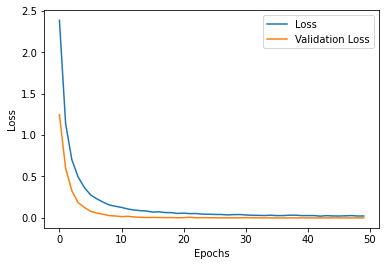

In [192]:
a = optimalModHist.history['loss']
b = optimalModHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

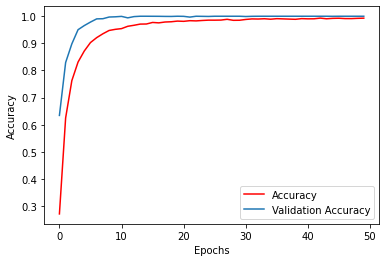

In [193]:
acc_hist = optimalModHist.history['acc']
val_acc_hist = optimalModHist.history['val_acc']
plt.plot(range(len(acc_hist)),acc_hist, 'r')
plt.plot(range(len(val_acc_hist)),val_acc_hist)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','Validation Accuracy'])

In [194]:
# Evaluate the trained network on the testing dataset
testLoss, testAcc = optimalMod.evaluate(cnn_x_test, y_test)
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 2s 233us/sample - loss: 0.1862 - acc: 0.9518
Test accuracy for this model is 0.9517568349838257


In [195]:
#initialize data for new data frame row
new_row = {'test': ['Optimized Model without Image Augmentation'],
                'training loss': [optimalModHist.history['loss'][-1]],
              'training acc': [optimalModHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,Multilayer Perceptron,0.001532,1.000000,0.834670,0.827245
1,LeNet original,0.000058,1.000000,0.807563,0.868935
2,vgg16 reshaped,3.177472,0.044728,3.199315,0.034300
3,1a: 10% DO,0.018993,0.994901,0.656520,0.877440
4,1b: 20% DO,0.018041,0.994706,0.541907,0.865588
5,2a: 10% DO,0.020911,0.993055,0.781442,0.855689
6,2b: 20% DO,0.035355,0.988733,0.569484,0.875627
7,3: 2 DO layers,0.025800,0.991695,0.228107,0.939626
8,4a: remove 120 dense,0.000598,1.000000,0.860999,0.848578
9,4b: remove 84 dense,0.000401,1.000000,0.743542,0.879532


In [196]:
# Save the weights (second runthrough)
# optimalMod.save_weights('./ASL_CNN_Image_Recognition/optimized_Model_Saved_ConstSeedNoAug')



In [197]:
# Create a new model instance
model = optimizedModel()
model.compile(optimizer=opt, loss=loss, metrics=['accuracy']) 

# Restore the weights
model.load_weights('./ASL_CNN_Image_Recognition/optimized_Model_Saved_ConstSeedNoAug')

# Evaluate the model to check that it matches
loss, acc = model.evaluate(cnn_x_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

7172/7172 [==============================] - 2s 306us/sample - loss: 0.1862 - acc: 0.9518
Restored model, accuracy: 95.18%


There are 346/7172 incorrectly labeled signs


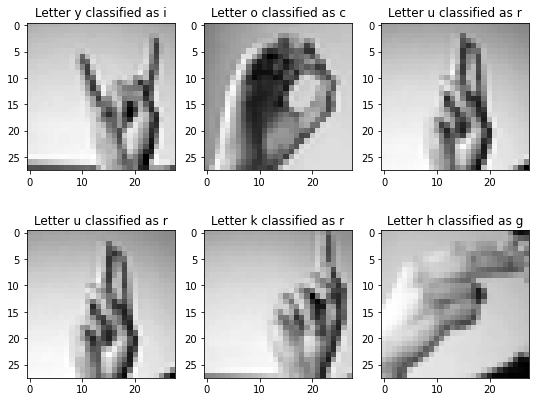

In [198]:
# Shows 6 random incorrect predictions with labels
preds = optimalMod.predict(cnn_x_test)
preds = np.argmax(preds, axis=1) # gives the corresponding label
preds_alphabet = numToAlpha(preds)
incorrectPreds = np.argwhere(preds_alphabet != labels_test_alphabet)
print("There are {}/{} incorrectly labeled signs".format(incorrectPreds.shape[0],cnn_x_test.shape[0]))
plt.figure(figsize=(9,7))

for i in range(6):
    plt.subplot(2,3,i+1)
    randIncInd = np.random.choice(incorrectPreds.reshape(-1))
    plt.imshow(cnn_x_test[randIncInd].reshape(28,28), cmap = 'gray')
    plt.title("Letter {} classified as {}".format(labels_test_alphabet[randIncInd], preds_alphabet[randIncInd]))
    
plt.show()

Text(95.72222222222221, 0.5, 'Actual')

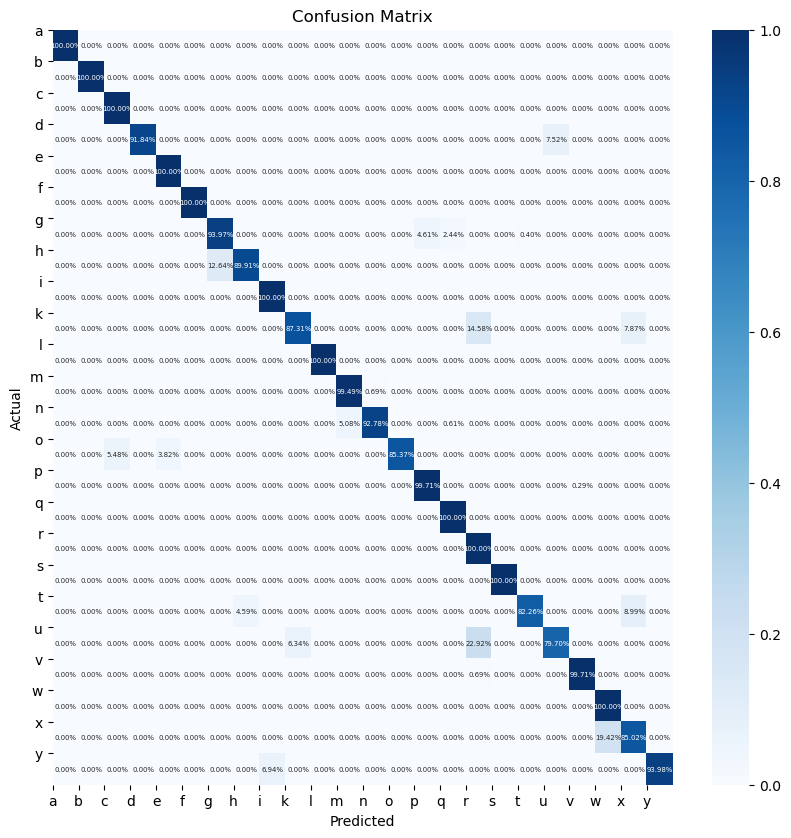

In [199]:
#Plot optimized confusion matrix
alphabet = ['a', 'b',  'c',  'd', 'e', 'f', 
                 'g', 'h', 'i',  'k',  'l', 
                  'm',  'n',  'o',  'p',  'q', 
                  'r', 's',  't',  'u',  'v', 
                  'w','x','y']
conMat = confusion_matrix(y_test, preds)
plt.figure(figsize=(10,10), dpi=100)
heatmap(conMat/np.sum(conMat,axis=1), annot=True, annot_kws={"size": 5}, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xticks(range(len(alphabet)), alphabet)
plt.yticks(range(len(alphabet)), alphabet, rotation='horizontal')
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Now Optimized Model with Image Augmentation

In [218]:
# LeNet model with optimized hyperparameters and architecture
loss = 'sparse_categorical_crossentropy'
def optimizedModelAug(dropout_rate1 = OPTIMAL_DROPOUT_RATE1, dropout_rate2 = OPTIMAL_DROPOUT_RATE2): # added optimal dropout rate
    # input
    xIn = keras.Input(shape=(28,28,1))
    
    # subsequent layers
    out = keras.layers.Conv2D(6, OPTIMAL_KERNEL_SIZE, activation='relu')(xIn)
    out = keras.layers.AveragePooling2D(2, 2)(out) 
    
    out = keras.layers.Dropout(rate = OPTIMAL_DROPOUT_RATE1, seed = SEED)(out) # rate = 30% DO
    
    out = keras.layers.Conv2D(16, OPTIMAL_KERNEL_SIZE, activation='relu')(out)
    out = keras.layers.AveragePooling2D(2, 2)(out)
    
    out = keras.layers.Dropout(rate = OPTIMAL_DROPOUT_RATE2, seed = SEED)(out) # rate = 30% DO
    
    out = keras.layers.Flatten()(out)
    out = keras.layers.Dense(120, activation='relu')(out)
    out = keras.layers.Dense(84, activation='relu')(out)
    out = keras.layers.Dense(25, name='prelogits')(out)  
    out = keras.layers.Activation('softmax', name='logits')(out)
    
    # Creates model
    mod = keras.Model(inputs=xIn, outputs=out) 
    
    return mod

# Declares the model and prepares it for training
optimalModAug = optimizedModelAug()
opt = keras.optimizers.Adam(learning_rate = OPTIMAL_LEARNING_RATE) #lr = default = 0.001
optimalModAug.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
optimalModAug.summary()

Model: "model_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_76 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_144 (Avera (None, 12, 12, 6)         0         
_________________________________________________________________
dropout_118 (Dropout)        (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_160 (Conv2D)          (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_145 (Avera (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_119 (Dropout)        (None, 4, 4, 16)          0  

In [219]:
#augment data with optimal batch size
augmentedData = ImageDataGenerator(rotation_range= 10, # randomly rotate images in the range 5 degrees 
                                   zoom_range = 0.1, # Randomly zoom image 10% 
                                   width_shift_range=0.1, # randomly shift images horizontally 10%
                                   height_shift_range=0.1, # randomly shift images vertically 10% 
                                   shear_range = 0.1) #randomly distorts/shears image, value affects intensity
augmentedData.fit(cnn_x_train)
train_generator = augmentedData.flow(cnn_x_train,y_train, batch_size = OPTIMAL_BATCH_SIZE) #batch size = 50
                              

In [220]:
%%time 
#fit model with augmented data, 2 additional DO layers, and optimized parameters
#include optimal epoch len, validation data is all of test data with image augmentation
optimalModAugHist = optimalModAug.fit(train_generator, validation_data = (cnn_x_test,y_test), epochs=OPTIMAL_EPOCH_LEN, 
                                  shuffle=True, callbacks = [early_stopping, history])

Epoch 1/50
550/550 [==============================] - 21s 38ms/step - loss: 2.3420 - acc: 0.2818 - val_loss: 1.2256 - val_acc: 0.6493
Epoch 2/50
550/550 [==============================] - 16s 28ms/step - loss: 1.4069 - acc: 0.5367 - val_loss: 0.7519 - val_acc: 0.7365
Epoch 3/50
550/550 [==============================] - 15s 28ms/step - loss: 1.0655 - acc: 0.6409 - val_loss: 0.5899 - val_acc: 0.8052
Epoch 4/50
550/550 [==============================] - 16s 30ms/step - loss: 0.8690 - acc: 0.7085 - val_loss: 0.4257 - val_acc: 0.8691
Epoch 5/50
550/550 [==============================] - 15s 28ms/step - loss: 0.7538 - acc: 0.7417 - val_loss: 0.3628 - val_acc: 0.8808
Epoch 6/50
550/550 [==============================] - 15s 28ms/step - loss: 0.6724 - acc: 0.7672 - val_loss: 0.3675 - val_acc: 0.8720
Epoch 7/50
550/550 [==============================] - 15s 28ms/step - loss: 0.6085 - acc: 0.7913 - val_loss: 0.2776 - val_acc: 0.9163
Epoch 8/50
550/550 [==============================] - 16s 29ms

550/550 [==============================] - 15s 27ms/step - loss: 0.4022 - acc: 0.8598 - val_loss: 0.1983 - val_acc: 0.9253
Epoch 14/50
550/550 [==============================] - 15s 28ms/step - loss: 0.3860 - acc: 0.8673 - val_loss: 0.1401 - val_acc: 0.9568
Epoch 15/50
550/550 [==============================] - 15s 27ms/step - loss: 0.3592 - acc: 0.8743 - val_loss: 0.1218 - val_acc: 0.9626
Epoch 16/50
550/550 [==============================] - 16s 29ms/step - loss: 0.3519 - acc: 0.8795 - val_loss: 0.1082 - val_acc: 0.9689
Epoch 17/50
550/550 [==============================] - 15s 27ms/step - loss: 0.3349 - acc: 0.8840 - val_loss: 0.1059 - val_acc: 0.9572
Epoch 18/50
550/550 [==============================] - 15s 28ms/step - loss: 0.3253 - acc: 0.8863 - val_loss: 0.1123 - val_acc: 0.9672
Epoch 19/50
550/550 [==============================] - 15s 27ms/step - loss: 0.3074 - acc: 0.8940 - val_loss: 0.1063 - val_acc: 0.9665
Epoch 20/50
550/550 [==============================] - 16s 29ms/ste

550/550 [==============================] - 15s 28ms/step - loss: 0.2582 - acc: 0.9087 - val_loss: 0.0704 - val_acc: 0.9833
Epoch 26/50
550/550 [==============================] - 16s 28ms/step - loss: 0.2475 - acc: 0.9136 - val_loss: 0.0660 - val_acc: 0.9820
Epoch 27/50
550/550 [==============================] - 16s 28ms/step - loss: 0.2478 - acc: 0.9133 - val_loss: 0.0616 - val_acc: 0.9855
Epoch 28/50
550/550 [==============================] - 15s 28ms/step - loss: 0.2435 - acc: 0.9152 - val_loss: 0.0616 - val_acc: 0.9876
Epoch 29/50
550/550 [==============================] - 16s 28ms/step - loss: 0.2301 - acc: 0.9191 - val_loss: 0.0586 - val_acc: 0.9854
Epoch 30/50
550/550 [==============================] - 15s 28ms/step - loss: 0.2288 - acc: 0.9217 - val_loss: 0.0627 - val_acc: 0.9806
Epoch 31/50
550/550 [==============================] - 15s 28ms/step - loss: 0.2277 - acc: 0.9214 - val_loss: 0.0586 - val_acc: 0.9833
Epoch 32/50
550/550 [==============================] - 16s 29ms/ste

Epoch 38/50
550/550 [==============================] - 15s 27ms/step - loss: 0.1957 - acc: 0.9333 - val_loss: 0.0512 - val_acc: 0.9813
Epoch 39/50
550/550 [==============================] - 15s 28ms/step - loss: 0.1971 - acc: 0.9334 - val_loss: 0.0506 - val_acc: 0.9819
Epoch 40/50
550/550 [==============================] - 15s 27ms/step - loss: 0.1913 - acc: 0.9336 - val_loss: 0.0532 - val_acc: 0.9808
Epoch 41/50
550/550 [==============================] - 15s 27ms/step - loss: 0.1956 - acc: 0.9327 - val_loss: 0.0362 - val_acc: 0.9909
Epoch 42/50
550/550 [==============================] - 15s 27ms/step - loss: 0.1922 - acc: 0.9333 - val_loss: 0.0538 - val_acc: 0.9907
Epoch 43/50
550/550 [==============================] - 15s 27ms/step - loss: 0.1939 - acc: 0.9327 - val_loss: 0.0395 - val_acc: 0.9911
Epoch 44/50
550/550 [==============================] - 15s 28ms/step - loss: 0.1823 - acc: 0.9384 - val_loss: 0.0304 - val_acc: 0.9940
Epoch 45/50
550/550 [==============================] - 

550/550 [==============================] - 16s 28ms/step - loss: 0.1683 - acc: 0.9433 - val_loss: 0.0329 - val_acc: 0.9907
CPU times: user 17min 10s, sys: 1min 11s, total: 18min 22s
Wall time: 12min 58s


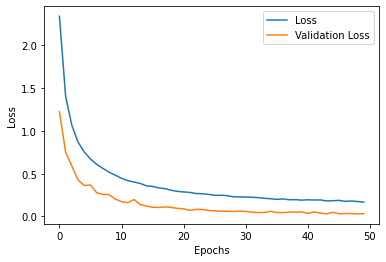

In [221]:
a = optimalModAugHist.history['loss']
b = optimalModAugHist.history['val_loss']
plt.plot(range(len(a)),a)
plt.plot(range(len(b)),b)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'])

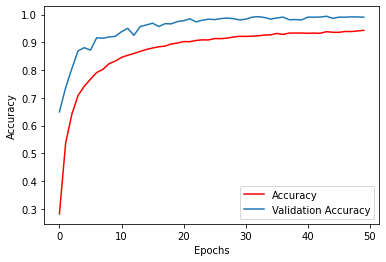

In [222]:
acc_hist = optimalModAugHist.history['acc']
val_acc_hist = optimalModAugHist.history['val_acc']
plt.plot(range(len(acc_hist)),acc_hist, 'r')
plt.plot(range(len(val_acc_hist)),val_acc_hist)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','Validation Accuracy'])

In [223]:
testLoss, testAcc = optimalModAug.evaluate(cnn_x_test, y_test) #gets test loss and accuracy
print("Test accuracy for this model is {}".format(testAcc))

7172/7172 [==============================] - 2s 220us/sample - loss: 0.0326 - acc: 0.9907
Test accuracy for this model is 0.9906581044197083


In [224]:
#initialize data for new data frame row
new_row = {'test': ['Optimized Model with Image Augmentation'],
                'training loss': [optimalModAugHist.history['loss'][-1]],
              'training acc': [optimalModAugHist.history['acc'][-1]],
              'testing loss':[testLoss],
              'testing acc': [testAcc]}
#create pandas df from data
add_df = pd.DataFrame(new_row)
#combine dataframs
model_info = pd.concat([model_info, add_df], ignore_index = True)
model_info.reset_index()
#display current data inside
model_info

,test,training loss,training acc,testing loss,testing acc
0,Multilayer Perceptron,0.001532,1.000000,0.834670,0.827245
1,LeNet original,0.000058,1.000000,0.807563,0.868935
2,vgg16 reshaped,3.177472,0.044728,3.199315,0.034300
3,1a: 10% DO,0.018993,0.994901,0.656520,0.877440
4,1b: 20% DO,0.018041,0.994706,0.541907,0.865588
5,2a: 10% DO,0.020911,0.993055,0.781442,0.855689
6,2b: 20% DO,0.035355,0.988733,0.569484,0.875627
7,3: 2 DO layers,0.025800,0.991695,0.228107,0.939626
8,4a: remove 120 dense,0.000598,1.000000,0.860999,0.848578
9,4b: remove 84 dense,0.000401,1.000000,0.743542,0.879532


### As expected, optimized model performed better with image augmentation (99.07%) versus without image augmentation (95.18%)
### However, the process took more than double the time 18 mins 22 sec vs 6 mins 36 sec

In [225]:
# Save the weights (second runthrough)
optimalModAug.save_weights('./ASL_CNN_Image_Recognition/optimized_Model_Saved_ConstSeedWithAug')

In [228]:
# Create a new model instance
loss = 'sparse_categorical_crossentropy'
modelAug = optimizedModel()
modelAug.compile(optimizer=opt, loss=loss, metrics=['accuracy']) 

# Restore the weights
modelAug.load_weights('./ASL_CNN_Image_Recognition/optimized_Model_Saved_ConstSeedWithAug')

# Evaluate the model to check that it matches
loss, acc = modelAug.evaluate(cnn_x_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

7172/7172 [==============================] - 2s 318us/sample - loss: 0.0326 - acc: 0.9907
Restored model, accuracy: 99.07%


There are 67/7172 incorrectly labeled signs


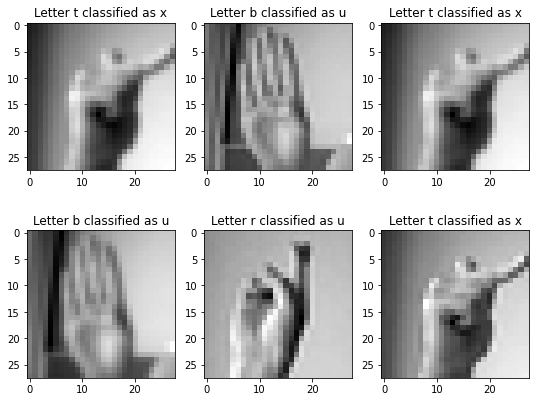

In [291]:
# Shows 6 random incorrect predictions with labels
predsAug = optimalModAug.predict(cnn_x_test)
predsAug = np.argmax(predsAug, axis=1) # gives the corresponding label
predsAugCopy = predsAug
preds_alphabetAug = numToAlpha(predsAug)
incorrectPredsAug = np.argwhere(preds_alphabetAug != labels_test_alphabet)
print("There are {}/{} incorrectly labeled signs".format(incorrectPredsAug.shape[0],cnn_x_test.shape[0]))
plt.figure(figsize=(9,7))

for i in range(6):
    plt.subplot(2,3,i+1)
    randIncInd = np.random.choice(incorrectPredsAug.reshape(-1))
    plt.imshow(cnn_x_test[randIncInd].reshape(28,28), cmap = 'gray')
    plt.title("Letter {} classified as {}".format(labels_test_alphabet[randIncInd], preds_alphabetAug[randIncInd]))
    
plt.show()

Text(95.72222222222221, 0.5, 'Actual')

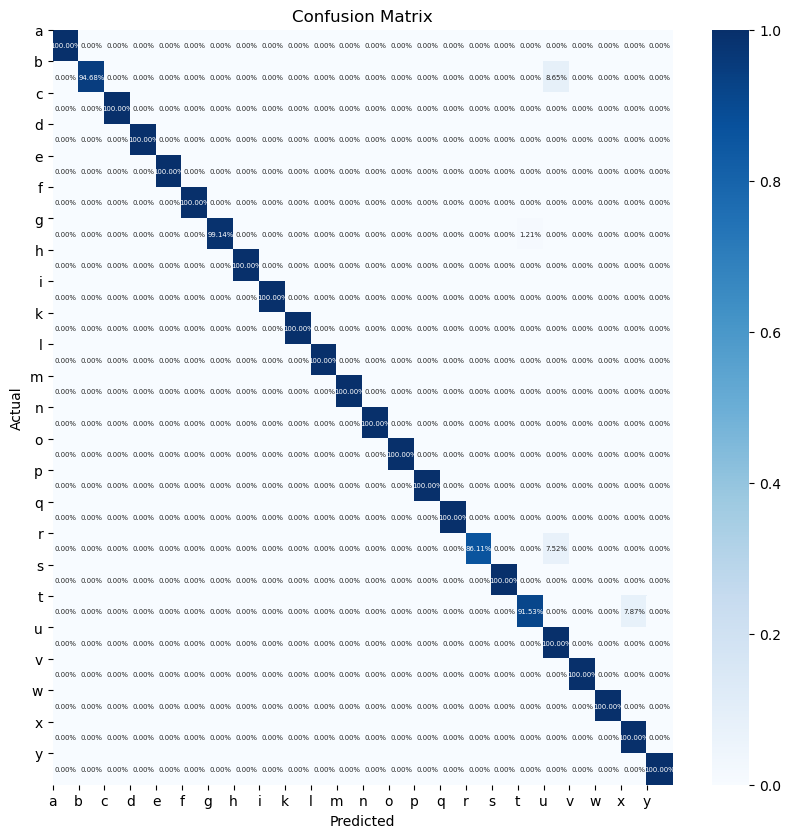

In [275]:
#Plot optimized confusion matrix
alphabet = ['a', 'b',  'c',  'd', 'e', 'f', 
                 'g', 'h', 'i',  'k',  'l', 
                  'm',  'n',  'o',  'p',  'q', 
                  'r', 's',  't',  'u',  'v', 
                  'w','x','y']
conMat = confusion_matrix(y_test, predsAug)
plt.figure(figsize=(10,10), dpi=100)
heatmap(conMat/np.sum(conMat,axis=1), annot=True, annot_kws={"size": 5}, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix")
plt.xticks(range(len(alphabet)), alphabet)
plt.yticks(range(len(alphabet)), alphabet, rotation='horizontal')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [295]:
# incorrectPredsAug holds all the indices with incorrectly predicted values

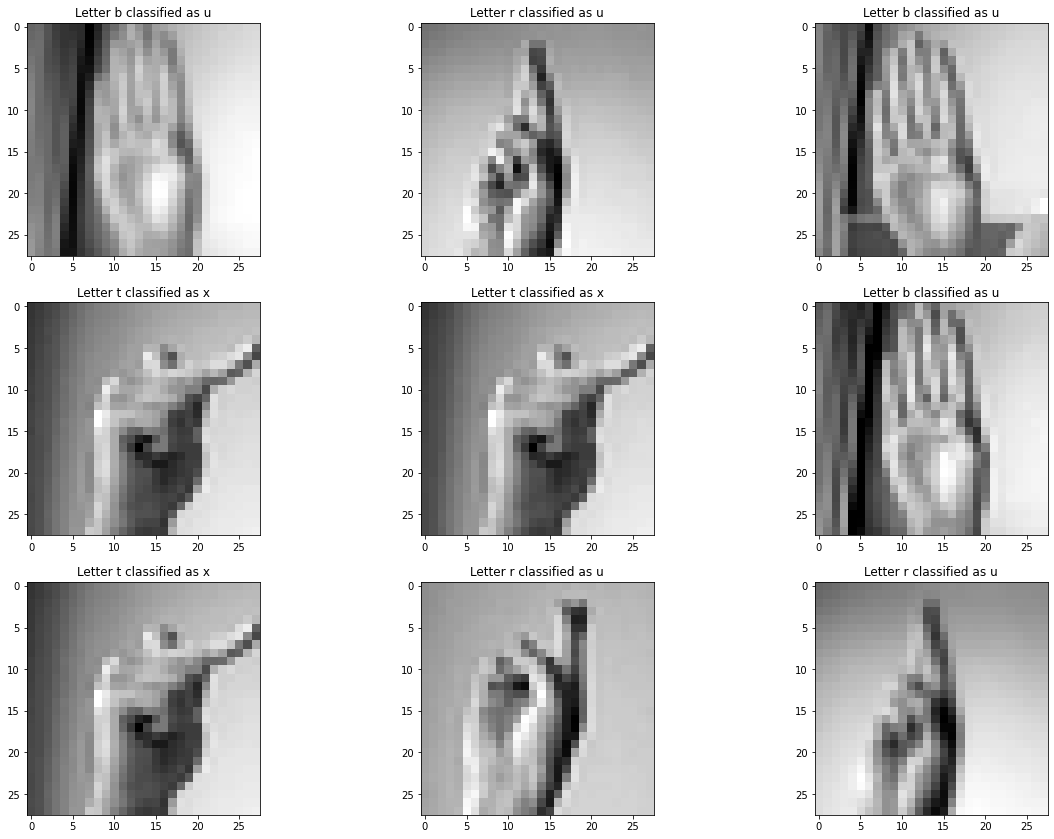

In [307]:
#Plot all 67 incorrectly predicted images
plt.figure(figsize=(20,30))
incInd = 0
for i in range(9):
    plt.subplot(6,3,i+1)
    plt.imshow(cnn_x_test[incorrectPredsAug[incInd][0]].reshape(28,28), cmap = 'gray')
    plt.title("Letter {} classified as {}".format(labels_test_alphabet[incorrectPredsAug[incInd][0]], 
                                                  preds_alphabetAug[incorrectPredsAug[incInd][0]]))
    incInd += 1

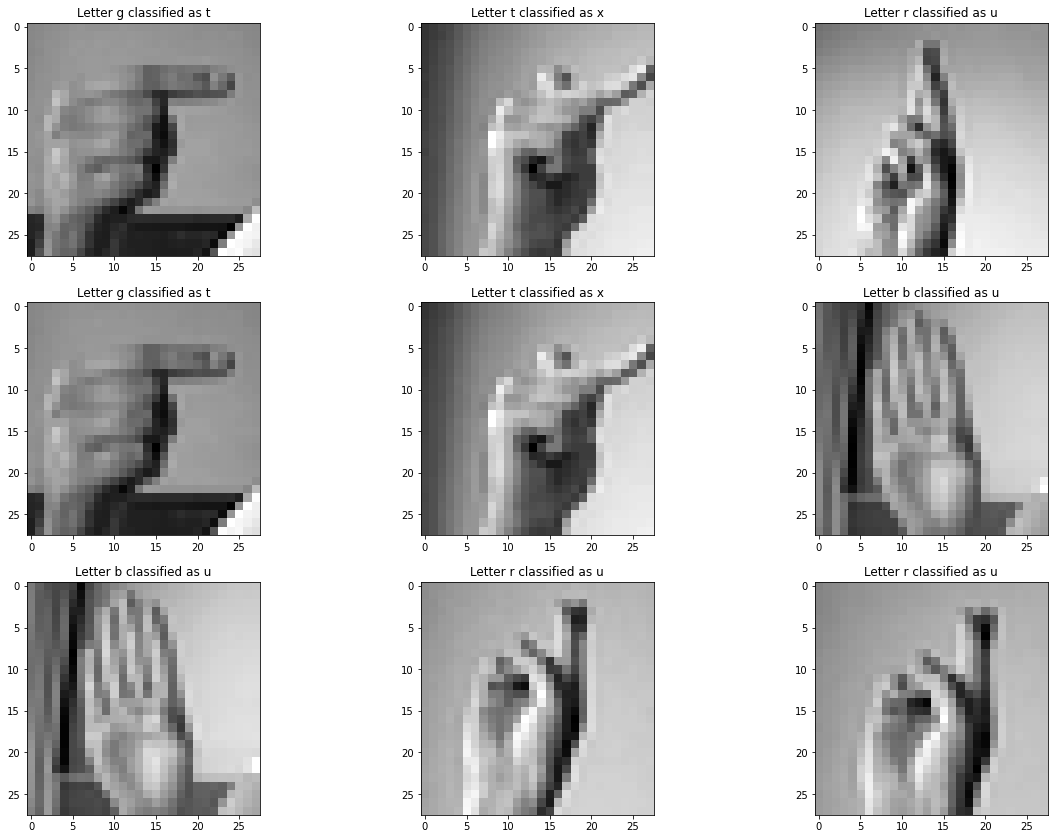

In [308]:
#plot next 9 pictures
plt.figure(figsize=(20,30))
for i in range(9):
    plt.subplot(6,3,i+1)
    plt.imshow(cnn_x_test[incorrectPredsAug[incInd][0]].reshape(28,28), cmap = 'gray')
    plt.title("Letter {} classified as {}".format(labels_test_alphabet[incorrectPredsAug[incInd][0]], 
                                                  preds_alphabetAug[incorrectPredsAug[incInd][0]]))
    incInd += 1

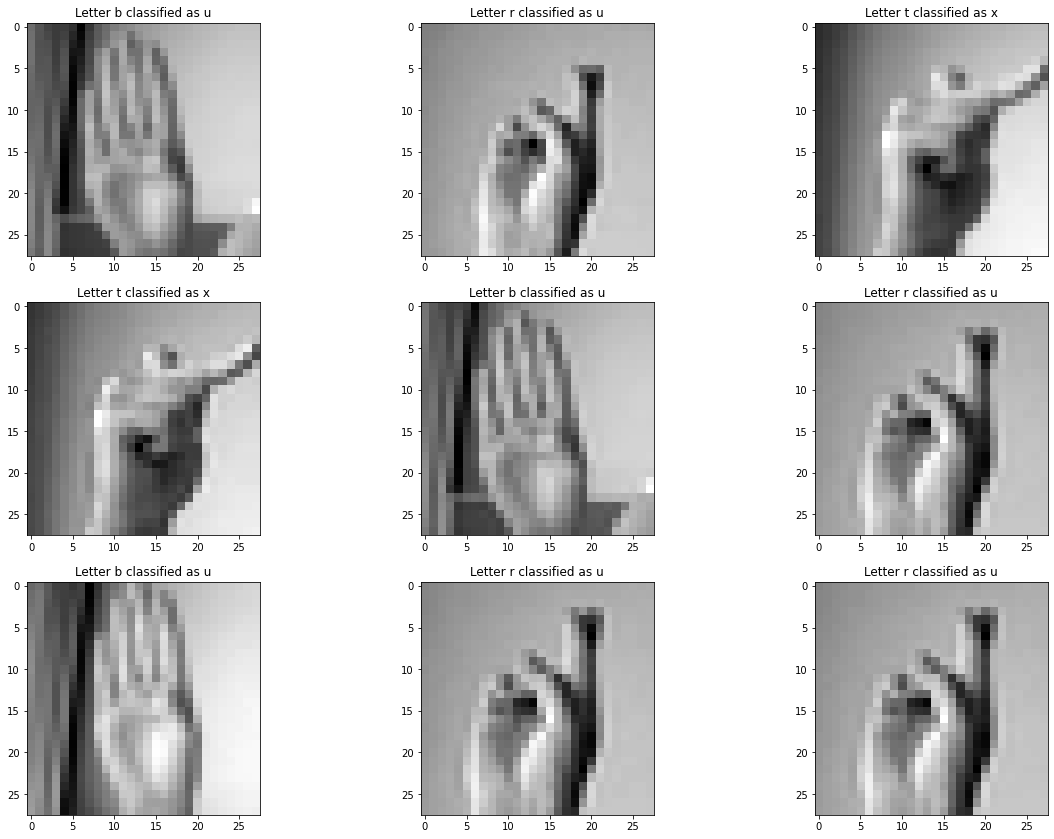

In [309]:
#plot next 9 pictures
plt.figure(figsize=(20,30))
for i in range(9):
    plt.subplot(6,3,i+1)
    plt.imshow(cnn_x_test[incorrectPredsAug[incInd][0]].reshape(28,28), cmap = 'gray')
    plt.title("Letter {} classified as {}".format(labels_test_alphabet[incorrectPredsAug[incInd][0]], 
                                                  preds_alphabetAug[incorrectPredsAug[incInd][0]]))
    incInd += 1

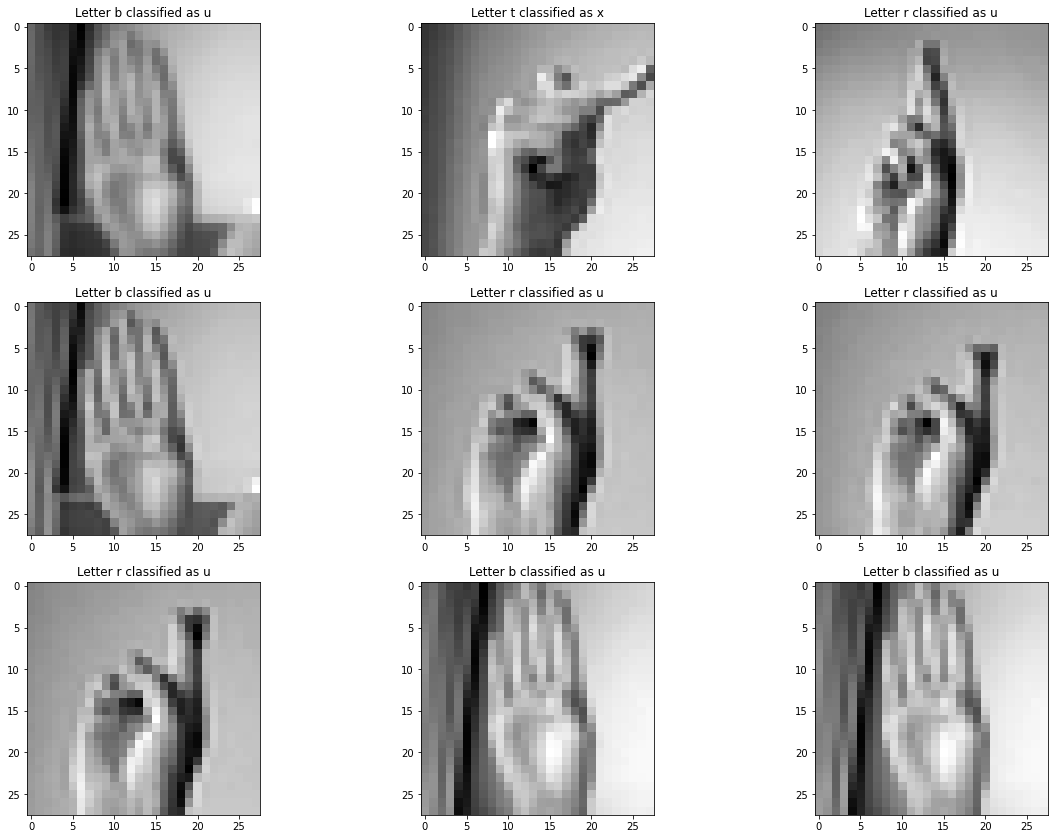

In [310]:
#plot next 9 pictures
plt.figure(figsize=(20,30))
for i in range(9):
    plt.subplot(6,3,i+1)
    plt.imshow(cnn_x_test[incorrectPredsAug[incInd][0]].reshape(28,28), cmap = 'gray')
    plt.title("Letter {} classified as {}".format(labels_test_alphabet[incorrectPredsAug[incInd][0]], 
                                                  preds_alphabetAug[incorrectPredsAug[incInd][0]]))
    incInd += 1

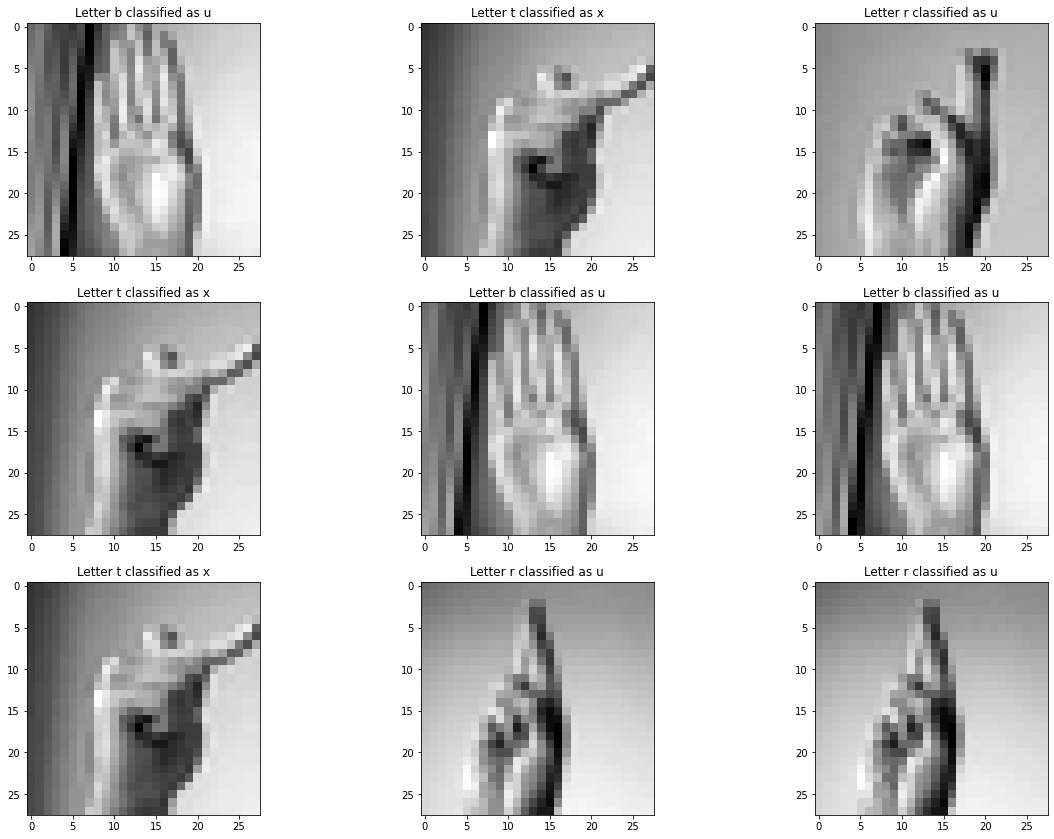

In [311]:
#plot next 9 pictures
plt.figure(figsize=(20,30))
for i in range(9):
    plt.subplot(6,3,i+1)
    plt.imshow(cnn_x_test[incorrectPredsAug[incInd][0]].reshape(28,28), cmap = 'gray')
    plt.title("Letter {} classified as {}".format(labels_test_alphabet[incorrectPredsAug[incInd][0]], 
                                                  preds_alphabetAug[incorrectPredsAug[incInd][0]]))
    incInd += 1

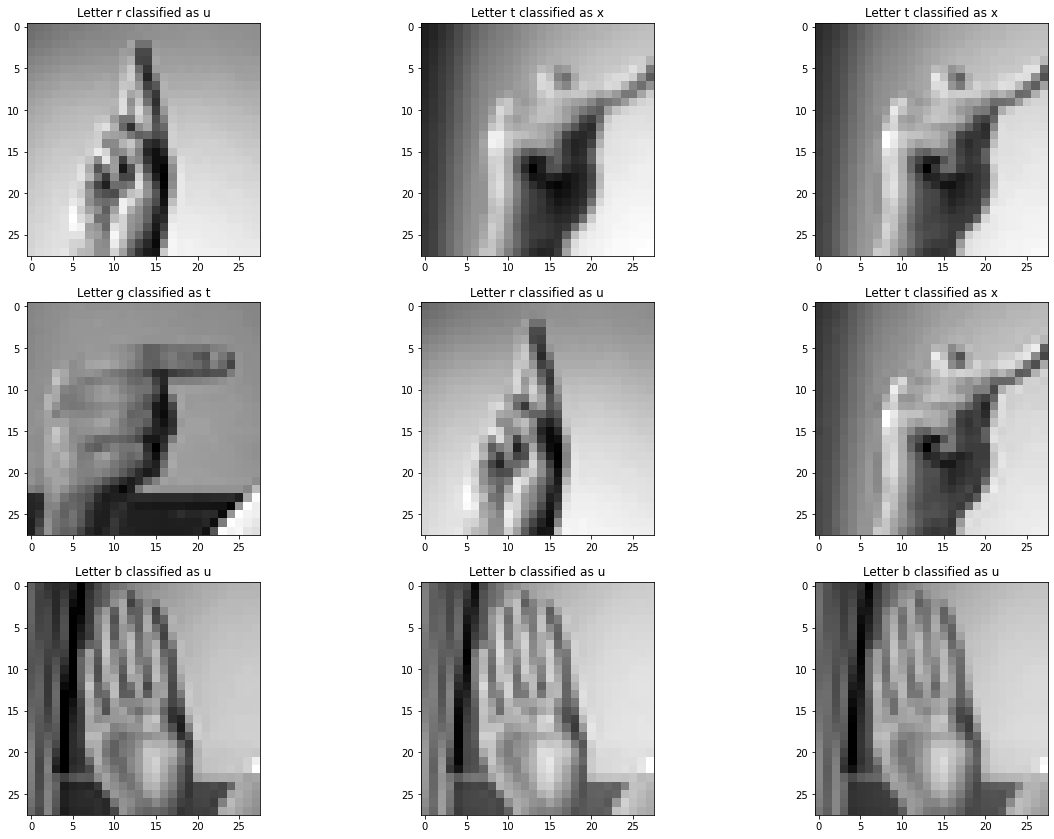

In [312]:
#plot next 9 pictures
plt.figure(figsize=(20,30))
for i in range(9):
    plt.subplot(6,3,i+1)
    plt.imshow(cnn_x_test[incorrectPredsAug[incInd][0]].reshape(28,28), cmap = 'gray')
    plt.title("Letter {} classified as {}".format(labels_test_alphabet[incorrectPredsAug[incInd][0]], 
                                                  preds_alphabetAug[incorrectPredsAug[incInd][0]]))
    incInd += 1

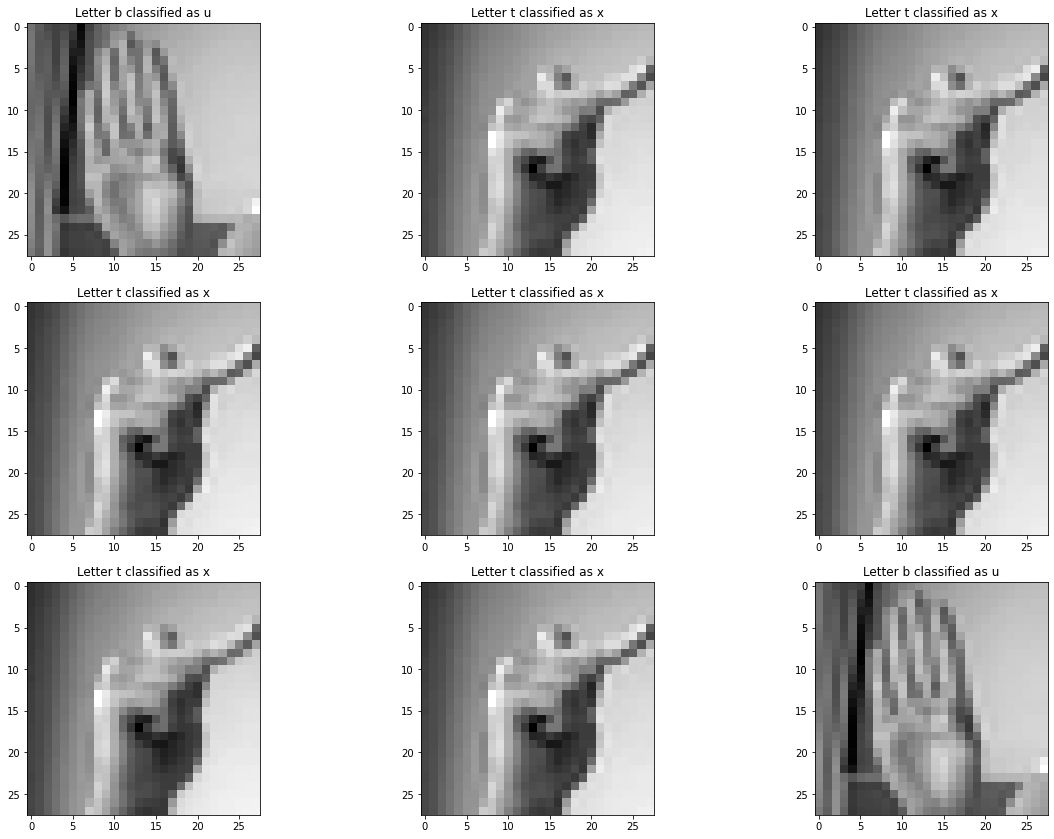

In [313]:
#plot next 9 pictures
plt.figure(figsize=(20,30))
for i in range(9):
    plt.subplot(6,3,i+1)
    plt.imshow(cnn_x_test[incorrectPredsAug[incInd][0]].reshape(28,28), cmap = 'gray')
    plt.title("Letter {} classified as {}".format(labels_test_alphabet[incorrectPredsAug[incInd][0]], 
                                                  preds_alphabetAug[incorrectPredsAug[incInd][0]]))
    incInd += 1

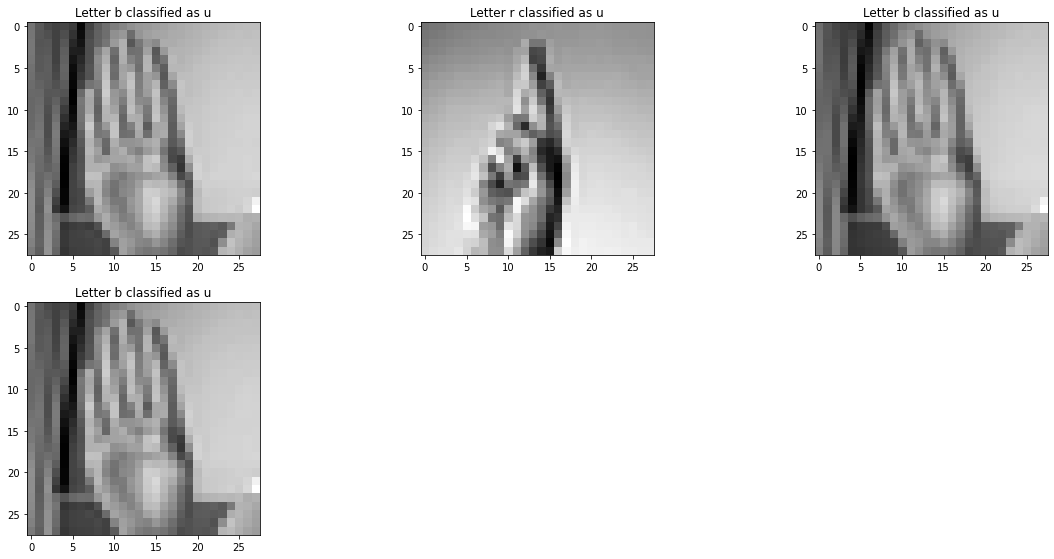

In [314]:
#plot next 9 pictures
plt.figure(figsize=(20,30))
for i in range(4):
    plt.subplot(6,3,i+1)
    plt.imshow(cnn_x_test[incorrectPredsAug[incInd][0]].reshape(28,28), cmap = 'gray')
    plt.title("Letter {} classified as {}".format(labels_test_alphabet[incorrectPredsAug[incInd][0]], 
                                                  preds_alphabetAug[incorrectPredsAug[incInd][0]]))
    incInd += 1